<a href="https://colab.research.google.com/github/fedelosio99/Nba_Draft_Coder/blob/main/Datasets_Cleanup_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
import plotly.express as px
import unicodedata as uc
import time
import requests
from google.colab import drive
import seaborn as sns

### error checking package
import pdb
import re
pd.set_option('display.max_columns', None)

In [2]:
url = 'https://raw.githubusercontent.com/fedelosio99/Nba_Draft_Coder/main/collegedf.csv'
df = pd.read_csv(url,index_col=0)
_CollegeStats = pd.read_csv(url,index_col=0)

In [3]:
url = 'https://raw.githubusercontent.com/fedelosio99/Nba_Draft_Coder/main/draftdf.csv'
df = pd.read_csv(url,index_col=0)
_Draft=pd.read_csv(url,index_col=0)

In [4]:
url = 'https://raw.githubusercontent.com/fedelosio99/Nba_Draft_Coder/main/playerdf.csv'

_Players=pd.read_csv(url,index_col=0)

In [5]:
_CollegeStats.head()

Player College_Season       College  College_Games_Played  \
0  Joe Barry Carroll         Career        Purdue                   123   
1   Darrell Griffith         Career    Louisville                   126   
2       Kevin McHale         Career     Minnesota                   112   
3      Kelvin Ransey         Career    Ohio State                   112   
4          James Ray         Career  Jacksonville                   110   

   College_Games_Started  College_Field_Goals_Made_Per_Game  \
0                   95.0                                7.1   
1                    NaN                                7.8   
2                    NaN                                6.4   
3                  109.0                                7.4   
4                   58.0                                6.0   

   College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                    13.0        0.546   
1                                    14.9        0.523   
2                                    11.5        0.553   
3                                    15.1        0.490   
4                                    10.9        0.546   

   College_2PT_Field_Goals_Made_Per_Game  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                         NaN                       NaN   
1                                         NaN                       NaN   
2                                         NaN                       NaN   
3                                         NaN                       NaN   
4                                         NaN                       NaN   

   College_2PT_FG%  College_3PT_Field_Goals_Made_Per_Game  \
0              NaN                                    NaN   
1              NaN                                    NaN   
2              NaN                                    NaN   
3              NaN                                    NaN   
4              NaN                                    NaN   

   College_3PT_Field_Goals_Attempted_Per_Game  College_3PT_FG%  \
0                                         NaN              NaN   
1                                         NaN              NaN   
2                                         NaN              NaN   
3                                         NaN              NaN   
4                                         NaN              NaN   

   College_Free_Throws_Made_Per_Game  College_Free_Throws_Attempted_Per_Game  \
0                                3.5                                     5.3   
1                                2.9                                     4.2   
2                                2.5                                     3.2   
3                                2.5                                     3.2   
4                                2.6                                     3.8   

   College_FT%  Total_Rebounds_pergame  Assists_pergame  Steals_pergame  \
0        0.651                     9.3              0.7             0.8   
1        0.697                     4.6              3.0             NaN   
2        0.773                     8.5              1.5             0.4   
3        0.780                     3.7              4.6             1.5   
4        0.679                     7.2              NaN             NaN   

   Blocks_pergame  Turnovers_pergame  Fouls_pergame  Points_pergame  \
0             2.8                NaN            2.9            17.7   
1             NaN                3.5            2.7            18.5   
2             2.1                NaN            NaN            15.2   
3             0.2                2.8            2.9            17.3   
4             NaN                NaN            NaN            14.5 

In [6]:
_CollegeStats.isnull().sum()

Player                                          0
College_Season                                138
College                                         0
College_Games_Played                            0
College_Games_Started                         136
College_Field_Goals_Made_Per_Game               0
College_Field_Goals_Attempted_Per_Game          1
College_FG%                                     1
College_2PT_Field_Goals_Made_Per_Game         519
College_2PT_Field_Goals_Attempted_Per_Game    520
College_Minutes_Per_Game                       73
College_2PT_FG%                               317
College_3PT_Field_Goals_Made_Per_Game         519
College_3PT_Field_Goals_Attempted_Per_Game    520
College_3PT_FG%                               466
College_Free_Throws_Made_Per_Game               0
College_Free_Throws_Attempted_Per_Game          1
College_FT%                                     2
Total_Rebounds_pergame                          1
Assists_pergame                                19


In [7]:
_CollegeStats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1911 entries, 0 to 1910
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player                                      1911 non-null   object 
 1   College_Season                              1773 non-null   object 
 2   College                                     1911 non-null   object 
 3   College_Games_Played                        1911 non-null   int64  
 4   College_Games_Started                       1775 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1911 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1910 non-null   float64
 7   College_FG%                                 1910 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1392 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1391 non-null   float64
 10  College_Minutes_P

In [8]:
_Draft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2019 entries, 0 to 2018
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pk          2019 non-null   int64  
 1   Tm          2019 non-null   object 
 2   Player      2019 non-null   object 
 3   College     2019 non-null   object 
 4   Yrs         1747 non-null   float64
 5   G           1747 non-null   float64
 6   MP          1747 non-null   float64
 7   PTS         1747 non-null   float64
 8   TRB         1747 non-null   float64
 9   AST         1747 non-null   float64
 10  FG%         1743 non-null   float64
 11  3P%         1602 non-null   float64
 12  FT%         1712 non-null   float64
 13  MP.1        1747 non-null   float64
 14  PTS.1       1747 non-null   float64
 15  TRB.1       1747 non-null   float64
 16  AST.1       1747 non-null   float64
 17  WS          1747 non-null   float64
 18  WS/48       1746 non-null   float64
 19  BPM         1746 non-null   floa

In [9]:
_CollegeStats['College_Season']=_CollegeStats['College_Season'].fillna(value=_CollegeStats['College'])
# filling college season column values in na with college name

In [10]:
_CollegeStats[_CollegeStats['College_Season'] != 'Career']
#this happens with players that played in multiple colleges and the scraping data only retreives info of their last college played

Player    College_Season           College  \
95       Elvis Rolle     Florida State     Florida State   
100     Mike Ferrara           Colgate           Colgate   
102    Derek Holcomb          Illinois          Illinois   
103     Zam Fredrick    South Carolina    South Carolina   
134    Mark McNamara        California        California   
...              ...               ...               ...   
1858   Vince Edwards  Western Kentucky  Western Kentucky   
1880  Brandon Clarke           Gonzaga           Gonzaga   
1890     Cody Martin            Nevada            Nevada   
1893   Eric Paschall         Villanova         Villanova   
1906   Marial Shayok        Iowa State        Iowa State   

      College_Games_Played  College_Games_Started  \
95                      59                    NaN   
100                     78                   27.0   
102                     89                   54.0   
103                     63                   62.0   
134                     53                    NaN   
...                    ...                    ...   
1858                    53                   13.0   
1880                    37                   36.0   
1890                    70                   68.0   
1893                   110                   82.0   
1906                    34                   34.0   

      College_Field_Goals_Made_Per_Game  \
95                                  6.2   
100                                 8.9   
102                                 2.6   
103                                 5.4   
134                                 7.8   
...                                 ...   
1858                                0.6   
1880                                6.9   
1890                                4.9   
1893                                4.0   
1906                                6.7   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
95                                      10.5        0.590   
100                                     18.6        0.481   
102                                      4.9        0.532   
103                                     13.6        0.399   
134                                     11.8        0.662   
...                                      ...          ...   
1858                                     1.5        0.390   
1880                                    10.1        0.687   
1890                                     9.6        0.511   
1893                                     8.2        0.487   
1906                                    13.6        0.496   

      College_2PT_Field_Goals_Made_Per_Game  \
95                                      NaN   
100                                     NaN   
102                                     NaN   
103                                     3.4   
134                                     NaN   
...                                     ...   
1858                                    0.6   
1880                                    6.8   
1890                                    4.2   
1893                                    2.9   
1906                                    4.6   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
95                                           NaN                      32.2   
100                                          NaN                      37.4   
102                                          NaN                      23.5   
103                                          7.9                      33.7   
134                                          NaN                      35.2   
...                                          ...                       ...   
1858                                         1.5                      11.3   
1880                                         9.7                      28.1   
1890                                         7.5                      35.1   
1893                                         4.8             

In [11]:
_CollegeStats.isnull().sum()

Player                                          0
College_Season                                  0
College                                         0
College_Games_Played                            0
College_Games_Started                         136
College_Field_Goals_Made_Per_Game               0
College_Field_Goals_Attempted_Per_Game          1
College_FG%                                     1
College_2PT_Field_Goals_Made_Per_Game         519
College_2PT_Field_Goals_Attempted_Per_Game    520
College_Minutes_Per_Game                       73
College_2PT_FG%                               317
College_3PT_Field_Goals_Made_Per_Game         519
College_3PT_Field_Goals_Attempted_Per_Game    520
College_3PT_FG%                               466
College_Free_Throws_Made_Per_Game               0
College_Free_Throws_Attempted_Per_Game          1
College_FT%                                     2
Total_Rebounds_pergame                          1
Assists_pergame                                19


In [12]:
_CollegeStats[_CollegeStats['Turnovers_pergame'].isna()]

Player College_Season              College  \
0     Joe Barry Carroll         Career               Purdue   
2          Kevin McHale         Career            Minnesota   
4             James Ray         Career         Jacksonville   
7          Andrew Toney         Career            Louisiana   
8        Michael Brooks         Career             La Salle   
...                 ...            ...                  ...   
1140      Mike Dunleavy         Career       South Carolina   
1313        Bobby Jones         Career                  UNC   
1426   Gerald Henderson         Career                  VCU   
1515   Derrick Williams         Career  Birmingham-Southern   
1804      Frank Jackson         Career     Georgia Southern   

      College_Games_Played  College_Games_Started  \
0                      123                   95.0   
2                      112                    NaN   
4                      110                   58.0   
7                      107                   50.0   
8                      114                    NaN   
...                    ...                    ...   
1140                   111                    NaN   
1313                    92                    NaN   
1426                   103                    NaN   
1515                    27                   27.0   
1804                    52                   13.0   

      College_Field_Goals_Made_Per_Game  \
0                                   7.1   
2                                   6.4   
4                                   6.0   
7                                   9.3   
8                                   9.3   
...                                 ...   
1140                                5.5   
1313                                5.7   
1426                                6.6   
1515                                3.2   
1804                                1.8   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                       13.0        0.546   
2                                       11.5        0.553   
4                                       10.9        0.546   
7                                       17.6        0.529   
8                                       17.3        0.538   
...                                      ...          ...   
1140                                    11.4        0.484   
1313                                     9.3        0.608   
1426                                    13.8        0.481   
1515                                     7.7        0.418   
1804                                     3.8        0.472   

      College_2PT_Field_Goals_Made_Per_Game  \
0                                       NaN   
2                                       NaN   
4                                       NaN   
7                                       NaN   
8                                       NaN   
...                                     ...   
1140                                    NaN   
1313                                    NaN   
1426                                    NaN   
1515                                    1.3   
1804                                    1.8   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                            NaN                       NaN   
2                                            NaN                       NaN   
4                                            NaN                       NaN   
7                                            NaN                       NaN   
8                                            NaN                       NaN   
...                                          ...                       ...   
1140                                         NaN                       NaN   
1313                                         NaN                       NaN   
1426                                         NaN                       NaN   
1515                        

In [13]:
_CollegeStats['Team_strength_of_schedule']=_CollegeStats['Team_strength_of_schedule'].fillna(value=_CollegeStats['Team_strength_of_schedule'].mean())
#adding Strength of schedule to all players with the mean of all the values

In [14]:
null_mask = _CollegeStats.isnull().any(axis=1)
null_rows = _CollegeStats[null_mask]

null_rows

Player College_Season           College  \
0     Joe Barry Carroll         Career            Purdue   
1      Darrell Griffith         Career        Louisville   
2          Kevin McHale         Career         Minnesota   
3         Kelvin Ransey         Career        Ohio State   
4             James Ray         Career      Jacksonville   
...                 ...            ...               ...   
1816       Ike Anigbogu         Career              UCLA   
1842    Robert Williams         Career  Florida Atlantic   
1851        Bruce Brown         Career           Hampton   
1870       Jaxson Hayes         Career             Texas   
1891     Daniel Gafford         Career          Arkansas   

      College_Games_Played  College_Games_Started  \
0                      123                   95.0   
1                      126                    NaN   
2                      112                    NaN   
3                      112                  109.0   
4                      110                   58.0   
...                    ...                    ...   
1816                    29                    0.0   
1842                   122                   59.0   
1851                   114                   75.0   
1870                    32                   21.0   
1891                    67                   58.0   

      College_Field_Goals_Made_Per_Game  \
0                                   7.1   
1                                   7.8   
2                                   6.4   
3                                   7.4   
4                                   6.0   
...                                 ...   
1816                                2.0   
1842                                2.7   
1851                                3.7   
1870                                3.8   
1891                                5.6   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                       13.0        0.546   
1                                       14.9        0.523   
2                                       11.5        0.553   
3                                       15.1        0.490   
4                                       10.9        0.546   
...                                      ...          ...   
1816                                     3.5        0.564   
1842                                     5.6        0.487   
1851                                     6.2        0.602   
1870                                     5.3        0.728   
1891                                     8.9        0.635   

      College_2PT_Field_Goals_Made_Per_Game  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
1816                                    2.0   
1842                                    2.7   
1851                                    3.7   
1870                                    3.8   
1891                                    5.6   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                            NaN                       NaN   
1                                            NaN                       NaN   
2                                            NaN                       NaN   
3                                            NaN                       NaN   
4                                            NaN                       NaN   
...                                          ...                       ...   
1816                                         3.5                      13.0   
1842                                         5.6                      19.7   
1851                                         6.2                      20.4   
1870                                         5.3                

In [15]:
fig = px.histogram(_Draft, x="G",labels={'G':'NBA_Games_Played','y':'count'})
fig.show()

# Merging The 3 Dataframes


1.   _College Stats
2.   _Draft
3.   _Players






In [16]:
_final_df = _CollegeStats.merge(_Draft, on='Link', how='left').merge(_Players, on='Link', how='left')
# i used a left join in order to just bring information about the players that i could retrive college stats

In [17]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    1927 non-null   object 
 1   College_Season                              1927 non-null   object 
 2   College_x                                   1927 non-null   object 
 3   College_Games_Played                        1927 non-null   int64  
 4   College_Games_Started                       1786 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1927 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1926 non-null   float64
 7   College_FG%                                 1926 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1399 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1398 non-null   float64
 10  College_Minu

In [18]:
_final_df[_final_df['colleges'] != _final_df['College_y']]

Player_x College_Season              College_x  \
31     David Lawrence         Career  College of Charleston   
32      Bruce Collins         Career            Weber State   
33    Roosevelt Bouie         Career               Syracuse   
36       Terry Stotts         Career               Oklahoma   
40    Kimberly Belton         Career               Stanford   
...               ...            ...                    ...   
1896   Brandon Clarke        Gonzaga                Gonzaga   
1906      Cody Martin         Nevada                 Nevada   
1909    Eric Paschall      Villanova              Villanova   
1922    Marial Shayok     Iowa State             Iowa State   
1924     Jaylen Hands         Career                   UCLA   

      College_Games_Played  College_Games_Started  \
31                      61                   54.0   
32                     120                   91.0   
33                     118                    NaN   
36                      91                   63.0   
40                     107                  104.0   
...                    ...                    ...   
1896                    37                   36.0   
1906                    70                   68.0   
1909                   110                   82.0   
1922                    34                   34.0   
1924                    64                   48.0   

      College_Field_Goals_Made_Per_Game  \
31                                  3.8   
32                                  6.9   
33                                  5.3   
36                                  5.0   
40                                  5.9   
...                                 ...   
1896                                6.9   
1906                                4.9   
1909                                4.0   
1922                                6.7   
1924                                4.1   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
31                                       9.2        0.411   
32                                      14.1        0.486   
33                                       9.0        0.593   
36                                      10.2        0.489   
40                                      10.3        0.572   
...                                      ...          ...   
1896                                    10.1        0.687   
1906                                     9.6        0.511   
1909                                     8.2        0.487   
1922                                    13.6        0.496   
1924                                     9.9        0.409   

      College_2PT_Field_Goals_Made_Per_Game  \
31                                      2.2   
32                                      NaN   
33                                      NaN   
36                                      NaN   
40                                      NaN   
...                                     ...   
1896                                    6.8   
1906                                    4.2   
1909                                    2.9   
1922                                    4.6   
1924                                    2.4   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
31                                           4.4                      32.0   
32                                           NaN                       NaN   
33                                           NaN                       NaN   
36                                           NaN                       NaN   
40                                           NaN                       NaN   
...                                          ...                       ...   
1896                                         9.7                      28.1   
1906                                         7.5                      35.1   
1909                                         4.8                      29.2   
1922                    

In [19]:
pd.set_option('display.max_rows', None)
a=_final_df.groupby(['College_x', 'College_y']).size()
# some players after the join, have differente college columns of different df

In [20]:
# checking results
a

College_x                 College_y                               
Alabama                   Alabama                                     19
                          Arizona State                                2
                          Indian Hills Community College               1
Alabama State             Alabama State University                     1
Alcorn State              Alcorn State                                 1
                          Utah State University                        1
American                  American University                          1
Arizona                   Arizona                                     39
Arizona State             Arizona State                               12
Arkansas                  Arkansas                                    17
Arkansas State            Arkansas State University                    1
Auburn                    Auburn                                      10
                          Illinois                       

### Correcting some of the errors of colleges in order for them to be the same name and validate

In [21]:
_final_df['College_y'] = _final_df['College_y'].str.replace('University of ', '', regex=True)


In [22]:
_final_df['College_y'] = _final_df['College_y'].str.replace(' University', '', regex=True)
_final_df['College_x'] = _final_df['College_x'].str.replace(' University', '', regex=True)

In [23]:
_final_df['College_x'] = _final_df['College_x'].str.replace('Bowling Green State', 'Bowling Green', regex=True)


In [24]:
_final_df['College_x'] = _final_df['College_x'].str.replace(r"Miami (OH)", 'Miami')

In [25]:
_final_df[_final_df['College_x'] == 'Miami (OH)']


Empty DataFrame
Columns: [Player_x, College_Season, College_x, College_Games_Played, College_Games_Started, College_Field_Goals_Made_Per_Game, College_Field_Goals_Attempted_Per_Game, College_FG%, College_2PT_Field_Goals_Made_Per_Game, College_2PT_Field_Goals_Attempted_Per_Game, College_Minutes_Per_Game, College_2PT_FG%, College_3PT_Field_Goals_Made_Per_Game, College_3PT_Field_Goals_Attempted_Per_Game, College_3PT_FG%, College_Free_Throws_Made_Per_Game, College_Free_Throws_Attempted_Per_Game, College_FT%, Total_Rebounds_pergame, Assists_pergame, Steals_pergame, Blocks_pergame, Turnovers_pergame, Fouls_pergame, Points_pergame, Team_strength_of_schedule, Link, Pk, Tm, Player_y, College_y, Yrs, G, MP, PTS, TRB, AST, FG%, 3P%, FT%, MP.1, PTS.1, TRB.1, AST.1, WS, WS/48, BPM, VORP, Draft_Year, Player, year_min, year_max, pos, height, weight, birth_date, colleges]
Index: []

In [26]:
# all the colleges that are differently typed, but are the same and being corrected
CollegeY=['Austin Peay State','Central Connecticut State','UNC Charlotte','Dartmouth College','Iona College','Missouri-Kansas City','Long Island','Cal State Long Beach','Loyola Chicago','Manhattan College','Marist College','United States Naval Academy','the Pacific','Saint Francis','Southern and A&M College',"St. John's","Saint Joseph's",'Tennessee Technological','California, Irvine','Central Florida','UC Santa Barbara','Illinois at Chicago','Tennessee at Martin','Texas-El Paso']
CollegeYCorrected= ['Austin Peay','Central Connecticut','Charlotte','Dartmouth','Iona','Kansas City','LIU','Long Beach State','Loyola (IL)','Manhattan','Marist','Navy','Pacific','Saint Francis (PA)','Southern',"St. John's (NY)","St. Joseph's",'Tennessee Tech','UC-Irvine','UCF','UCSB','UIC','UT-Martin','UTEP']

In [27]:
for i in range(len(CollegeY)):

    _final_df['College_y'] = _final_df['College_y'].str.replace(CollegeY[i],CollegeYCorrected[i],regex=True)


In [28]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['College_x'] != _final_df['College_y']]

# all of these are players that in the join brought the wrong information so are not useful for analisis
# some players have the same name and in the sports reference page their player link is name-surname-2 instead of 1

Player_x    College_Season              College_x  \
31     David Lawrence            Career  College of Charleston   
41     Billy Williams            Career             Binghamton   
53        Mike Harper            Career                 Butler   
55      John Campbell            Career               Bucknell   
63      Steve Johnson            Career                   Duke   
...               ...               ...                    ...   
1857  Robert Williams            Career       Florida Atlantic   
1866      Bruce Brown            Career                Hampton   
1873    Vince Edwards  Western Kentucky       Western Kentucky   
1889  Cameron Johnson            Career            Texas State   
1908     Justin James            Career           Sacred Heart   

      College_Games_Played  College_Games_Started  \
31                      61                   54.0   
41                      81                   49.0   
53                     105                   33.0   
55                      22                    0.0   
63                      21                    0.0   
...                    ...                    ...   
1857                   122                   59.0   
1866                   114                   75.0   
1873                    53                   13.0   
1889                   118                   79.0   
1908                    93                   19.0   

      College_Field_Goals_Made_Per_Game  \
31                                  3.8   
41                                  1.4   
53                                  0.6   
55                                  0.7   
63                                  0.1   
...                                 ...   
1857                                2.7   
1866                                3.7   
1873                                0.6   
1889                                3.7   
1908                                1.9   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
31                                       9.2        0.411   
41                                       3.6        0.403   
53                                       1.4        0.448   
55                                       1.3        0.517   
63                                       0.2        0.500   
...                                      ...          ...   
1857                                     5.6        0.487   
1866                                     6.2        0.602   
1873                                     1.5        0.390   
1889                                     8.0        0.464   
1908                                     4.7        0.402   

      College_2PT_Field_Goals_Made_Per_Game  \
31                                      2.2   
41                                      0.8   
53                                      NaN   
55                                      NaN   
63                                      0.1   
...                                     ...   
1857                                    2.7   
1866                                    3.7   
1873                                    0.6   
1889                                    3.7   
1908                                    1.4   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
31                                           4.4                      32.0   
41                                           1.8                      21.6   
53                                           NaN                      12.1   
55                                           NaN                       3.5   
63                                           0.2                       1.9   
...                                          ...                       ...   
1857                                         5.6                      19.7   
1866                                         6.2                      20.4   
1873                                         1.5                  

In [29]:
_final_df[_final_df['Player_x'] != _final_df['Player_y']]

Empty DataFrame
Columns: [Player_x, College_Season, College_x, College_Games_Played, College_Games_Started, College_Field_Goals_Made_Per_Game, College_Field_Goals_Attempted_Per_Game, College_FG%, College_2PT_Field_Goals_Made_Per_Game, College_2PT_Field_Goals_Attempted_Per_Game, College_Minutes_Per_Game, College_2PT_FG%, College_3PT_Field_Goals_Made_Per_Game, College_3PT_Field_Goals_Attempted_Per_Game, College_3PT_FG%, College_Free_Throws_Made_Per_Game, College_Free_Throws_Attempted_Per_Game, College_FT%, Total_Rebounds_pergame, Assists_pergame, Steals_pergame, Blocks_pergame, Turnovers_pergame, Fouls_pergame, Points_pergame, Team_strength_of_schedule, Link, Pk, Tm, Player_y, College_y, Yrs, G, MP, PTS, TRB, AST, FG%, 3P%, FT%, MP.1, PTS.1, TRB.1, AST.1, WS, WS/48, BPM, VORP, Draft_Year, Player, year_min, year_max, pos, height, weight, birth_date, colleges]
Index: []

In [30]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['birth_date'].isnull()]

Player_x College_Season              College_x  \
31     David Lawrence         Career  College of Charleston   
32      Bruce Collins         Career            Weber State   
33    Roosevelt Bouie         Career               Syracuse   
36       Terry Stotts         Career               Oklahoma   
40    Kimberly Belton         Career               Stanford   
...               ...            ...                    ...   
1750     Cady Lalanne         Career                  UMass   
1752      J.P. Tokoto         Career                    UNC   
1793   Isaiah Cousins         Career               Oklahoma   
1872        Tony Carr         Career             Penn State   
1924     Jaylen Hands         Career                   UCLA   

      College_Games_Played  College_Games_Started  \
31                      61                   54.0   
32                     120                   91.0   
33                     118                    NaN   
36                      91                   63.0   
40                     107                  104.0   
...                    ...                    ...   
1750                   111                   80.0   
1752                   107                   67.0   
1793                   137                  119.0   
1872                    70                   70.0   
1924                    64                   48.0   

      College_Field_Goals_Made_Per_Game  \
31                                  3.8   
32                                  6.9   
33                                  5.3   
36                                  5.0   
40                                  5.9   
...                                 ...   
1750                                3.8   
1752                                2.7   
1793                                3.5   
1872                                5.5   
1924                                4.1   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
31                                       9.2        0.411   
32                                      14.1        0.486   
33                                       9.0        0.593   
36                                      10.2        0.489   
40                                      10.3        0.572   
...                                      ...          ...   
1750                                     6.9        0.553   
1752                                     5.8        0.462   
1793                                     8.5        0.408   
1872                                    13.9        0.396   
1924                                     9.9        0.409   

      College_2PT_Field_Goals_Made_Per_Game  \
31                                      2.2   
32                                      NaN   
33                                      NaN   
36                                      NaN   
40                                      NaN   
...                                     ...   
1750                                    3.7   
1752                                    2.5   
1793                                    2.2   
1872                                    3.8   
1924                                    2.4   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
31                                           4.4                      32.0   
32                                           NaN                       NaN   
33                                           NaN                       NaN   
36                                           NaN                       NaN   
40                                           NaN                       NaN   
...                                          ...                       ...   
1750                                         6.5                      25.2   
1752                                         5.0                      22.3   
1793                                         5.3                      27.7   
1872                    

In [31]:
null_mask = _final_df.isnull().any(axis=1)
null_rows = _final_df[null_mask]
pd.set_option('display.max_rows', 20)
null_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 0 to 1925
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    877 non-null    object 
 1   College_Season                              877 non-null    object 
 2   College_x                                   877 non-null    object 
 3   College_Games_Played                        877 non-null    int64  
 4   College_Games_Started                       736 non-null    float64
 5   College_Field_Goals_Made_Per_Game           877 non-null    float64
 6   College_Field_Goals_Attempted_Per_Game      876 non-null    float64
 7   College_FG%                                 876 non-null    float64
 8   College_2PT_Field_Goals_Made_Per_Game       349 non-null    float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  348 non-null    float64
 10  College_Minutes_Pe

In [32]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1927 entries, 0 to 1926
Data columns (total 57 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Player_x                                    1927 non-null   object 
 1   College_Season                              1927 non-null   object 
 2   College_x                                   1927 non-null   object 
 3   College_Games_Played                        1927 non-null   int64  
 4   College_Games_Started                       1786 non-null   float64
 5   College_Field_Goals_Made_Per_Game           1927 non-null   float64
 6   College_Field_Goals_Attempted_Per_Game      1926 non-null   float64
 7   College_FG%                                 1926 non-null   float64
 8   College_2PT_Field_Goals_Made_Per_Game       1399 non-null   float64
 9   College_2PT_Field_Goals_Attempted_Per_Game  1398 non-null   float64
 10  College_Minu

In [33]:
Column_floats=['College_Games_Started','College_2PT_Field_Goals_Made_Per_Game','College_2PT_Field_Goals_Attempted_Per_Game','College_3PT_Field_Goals_Made_Per_Game','College_3PT_Field_Goals_Attempted_Per_Game','Turnovers_pergame','Fouls_pergame','height']
Column_perc = ['College_2PT_FG%','College_3PT_FG%']
Columns_date=['birth_date']

In [34]:
Column_floats=['College_Games_Started','College_2PT_Field_Goals_Made_Per_Game','College_2PT_Field_Goals_Attempted_Per_Game','College_3PT_Field_Goals_Made_Per_Game','College_3PT_Field_Goals_Attempted_Per_Game','Turnovers_pergame','Fouls_pergame']
Column_perc = ['College_2PT_FG%','College_3PT_FG%']
Columns_date=['birth_date']

def convert_height(height_str):
  """
  Converts a height string in feet and inches to a float representing the height in inches.

  Args:
    height_str: A string representing the height in feet and inches (e.g., '7-0').

  Returns:
    A float representing the height in inches."""

  if isinstance(height_str, str):
      feet, inches = height_str.split('-')
      return float(feet) * 12 + float(inches)
  else:
      return height_str

for column in Column_floats:
  _final_df[column] = _final_df[column].astype(np.float64)

#_final_df['height'] = _final_df['height'].apply(convert_height)
#_final_df['height'] = _final_df['height'].astype(np.float64)



for column in Columns_date:
  _final_df[column] = _final_df[column].astype('datetime64[ns]')

In [35]:
_final_df

Player_x College_Season     College_x  College_Games_Played  \
0     Joe Barry Carroll         Career        Purdue                   123   
1      Darrell Griffith         Career    Louisville                   126   
2          Kevin McHale         Career     Minnesota                   112   
3         Kelvin Ransey         Career    Ohio State                   112   
4             James Ray         Career  Jacksonville                   110   
...                 ...            ...           ...                   ...   
1922      Marial Shayok     Iowa State    Iowa State                    34   
1923           Kyle Guy         Career      Virginia                   106   
1924       Jaylen Hands         Career          UCLA                    64   
1925        Jordan Bone         Career     Tennessee                    95   
1926           Miye Oni         Career          Yale                    87   

      College_Games_Started  College_Field_Goals_Made_Per_Game  \
0                      95.0                                7.1   
1                       NaN                                7.8   
2                       NaN                                6.4   
3                     109.0                                7.4   
4                      58.0                                6.0   
...                     ...                                ...   
1922                   34.0                                6.7   
1923                   78.0                                4.4   
1924                   48.0                                4.1   
1925                   87.0                                3.6   
1926                   82.0                                5.2   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                       13.0        0.546   
1                                       14.9        0.523   
2                                       11.5        0.553   
3                                       15.1        0.490   
4                                       10.9        0.546   
...                                      ...          ...   
1922                                    13.6        0.496   
1923                                    10.1        0.433   
1924                                     9.9        0.409   
1925                                     8.4        0.424   
1926                                    12.1        0.428   

      College_2PT_Field_Goals_Made_Per_Game  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
1922                                    4.6   
1923                                    2.0   
1924                                    2.4   
1925                                    2.6   
1926                                    3.2   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                            NaN                       NaN   
1                                            NaN                       NaN   
2                                            NaN                       NaN   
3                                            NaN                       NaN   
4                                            NaN                       NaN   
...                                          ...                       ...   
1922                                         8.2                      32.9   
1923                                         4.5                      29.1   
1924                                         5.4                      28.3   
1925                                         5.7                      26.1   
1926                                         6.5                      31.7   

      College_2PT_FG%  College_3PT_Field_Goals_Mad

In [36]:
_final_df[_final_df['G'].isna()]

Player_x College_Season              College_x  \
31     David Lawrence         Career  College of Charleston   
32      Bruce Collins         Career            Weber State   
33    Roosevelt Bouie         Career               Syracuse   
36       Terry Stotts         Career               Oklahoma   
40    Kimberly Belton         Career               Stanford   
...               ...            ...                    ...   
1750     Cady Lalanne         Career                  UMass   
1752      J.P. Tokoto         Career                    UNC   
1793   Isaiah Cousins         Career               Oklahoma   
1872        Tony Carr         Career             Penn State   
1924     Jaylen Hands         Career                   UCLA   

      College_Games_Played  College_Games_Started  \
31                      61                   54.0   
32                     120                   91.0   
33                     118                    NaN   
36                      91                   63.0   
40                     107                  104.0   
...                    ...                    ...   
1750                   111                   80.0   
1752                   107                   67.0   
1793                   137                  119.0   
1872                    70                   70.0   
1924                    64                   48.0   

      College_Field_Goals_Made_Per_Game  \
31                                  3.8   
32                                  6.9   
33                                  5.3   
36                                  5.0   
40                                  5.9   
...                                 ...   
1750                                3.8   
1752                                2.7   
1793                                3.5   
1872                                5.5   
1924                                4.1   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
31                                       9.2        0.411   
32                                      14.1        0.486   
33                                       9.0        0.593   
36                                      10.2        0.489   
40                                      10.3        0.572   
...                                      ...          ...   
1750                                     6.9        0.553   
1752                                     5.8        0.462   
1793                                     8.5        0.408   
1872                                    13.9        0.396   
1924                                     9.9        0.409   

      College_2PT_Field_Goals_Made_Per_Game  \
31                                      2.2   
32                                      NaN   
33                                      NaN   
36                                      NaN   
40                                      NaN   
...                                     ...   
1750                                    3.7   
1752                                    2.5   
1793                                    2.2   
1872                                    3.8   
1924                                    2.4   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
31                                           4.4                      32.0   
32                                           NaN                       NaN   
33                                           NaN                       NaN   
36                                           NaN                       NaN   
40                                           NaN                       NaN   
...                                          ...                       ...   
1750                                         6.5                      25.2   
1752                                         5.0                      22.3   
1793                                         5.3                      27.7   
1872                    

In [37]:
_final_df=_final_df[_final_df['G']>=1]

In [38]:
_final_df['height'] = _final_df['height'].apply(convert_height)
_final_df['height'] = _final_df['height'].astype(np.float64)
_final_df['year_min'] = _final_df['year_min'].astype(np.int64)
_final_df['year_max'] = _final_df['year_max'].astype(np.int64)

<ipython-input-38-ae15d6b80b0c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-ae15d6b80b0c>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-ae15d6b80b0c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-ae15d6b

In [39]:
_final_df[_final_df['G'].isna()]

Empty DataFrame
Columns: [Player_x, College_Season, College_x, College_Games_Played, College_Games_Started, College_Field_Goals_Made_Per_Game, College_Field_Goals_Attempted_Per_Game, College_FG%, College_2PT_Field_Goals_Made_Per_Game, College_2PT_Field_Goals_Attempted_Per_Game, College_Minutes_Per_Game, College_2PT_FG%, College_3PT_Field_Goals_Made_Per_Game, College_3PT_Field_Goals_Attempted_Per_Game, College_3PT_FG%, College_Free_Throws_Made_Per_Game, College_Free_Throws_Attempted_Per_Game, College_FT%, Total_Rebounds_pergame, Assists_pergame, Steals_pergame, Blocks_pergame, Turnovers_pergame, Fouls_pergame, Points_pergame, Team_strength_of_schedule, Link, Pk, Tm, Player_y, College_y, Yrs, G, MP, PTS, TRB, AST, FG%, 3P%, FT%, MP.1, PTS.1, TRB.1, AST.1, WS, WS/48, BPM, VORP, Draft_Year, Player, year_min, year_max, pos, height, weight, birth_date, colleges]
Index: []

In [40]:
_final_df[_final_df['Draft_Year'] > (_final_df['year_min'])] # players should not be drafted and started playing before that, another error

Player_x College_Season       College_x  College_Games_Played  \
83       Eddie Johnson         Career          Auburn                   102   
88        Sam Williams         Career         Alabama                    10   
607      Larry Johnson         Career            UNLV                    75   
837       David Vaughn         Career         Memphis                    92   
860         Mark Davis         Career    Old Dominion                   110   
1150     Mike Dunleavy         Career  South Carolina                   111   
1229      Luke Jackson         Career          Oregon                   126   
1325       Bobby Jones         Career             UNC                    92   
1439  Gerald Henderson         Career             VCU                   103   
1877       George King         Career        Colorado                   127   

      College_Games_Started  College_Field_Goals_Made_Per_Game  \
83                      NaN                                7.7   
88                      0.0                                0.5   
607                    40.0                                8.2   
837                    87.0                                5.4   
860                    63.0                                3.9   
1150                    NaN                                5.5   
1229                  102.0                                5.1   
1325                    NaN                                5.7   
1439                    NaN                                6.6   
1877                   89.0                                3.5   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
83                                      17.4        0.444   
88                                       1.4        0.357   
607                                     12.7        0.643   
837                                     11.1        0.486   
860                                      7.7        0.501   
1150                                    11.4        0.484   
1229                                    11.1        0.461   
1325                                     9.3        0.608   
1439                                    13.8        0.481   
1877                                     7.9        0.444   

      College_2PT_Field_Goals_Made_Per_Game  \
83                                      NaN   
88                                      0.5   
607                                     7.8   
837                                     5.3   
860                                     NaN   
1150                                    NaN   
1229                                    3.7   
1325                                    NaN   
1439                                    NaN   
1877                                    2.1   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
83                                           NaN                       NaN   
88                                           1.4                       5.1   
607                                         11.5                      31.6   
837                                         10.7                      30.6   
860                                          NaN                      23.3   
1150                                         NaN                       NaN   
1229                                         7.7                      29.1   
1325                                         NaN                       NaN   
1439                                         NaN                       NaN   
1877                                         4.3                      22.6   

      College_2PT_FG%  College_3PT_Field_Goals_Made_Per_Game  \
83                NaN                                    NaN   
88              0.357                                    0.0   
607             0.672                                    0.4   
837             0.493                                    0.2   
860               NaN                           

In [41]:
_final_df=_final_df[_final_df['Draft_Year'] <= (_final_df['year_min'])]

In [42]:
# prompt: remove duplicate rows where player_x is the same

_final_df.drop_duplicates(subset='Player_x', keep='first', inplace=True)


<ipython-input-42-4c9306bb31ab>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
pd.set_option('display.max_rows', None)
_final_df[_final_df['College_x'] != _final_df['College_y']].groupby(['College_x','College_y']).size()

College_x               College_y                     
Alabama                 Arizona State                     1
                        Indian Hills Community College    1
Auburn                  Illinois                          1
                        West Florida                      1
Austin Peay             Kentucky                          1
BYU                     Oklahoma State                    1
Ball State              Detroit Mercy                     1
Birmingham-Southern     Arizona                           1
Bradley                 Boston College                    1
Butler                  North Park                        1
Canisius                Oregon                            1
Central Arkansas        Virginia                          1
Charleston Southern     Syracuse                          1
Cincinnati              Walsh                             1
Clemson                 Kentucky                          1
Cleveland State         Oregon State         

In [44]:
pd.set_option('display.max_rows', 20)
_final_df[_final_df['College_x'] != _final_df['College_y']]

Player_x    College_Season         College_x  \
53           Mike Harper            Career            Butler   
63         Steve Johnson            Career              Duke   
84         Eddie Johnson            Career            Auburn   
89          Sam Williams            Career           Alabama   
99    Steve Lingenfelter            Career         Minnesota   
...                  ...               ...               ...   
1857     Robert Williams            Career  Florida Atlantic   
1866         Bruce Brown            Career           Hampton   
1873       Vince Edwards  Western Kentucky  Western Kentucky   
1889     Cameron Johnson            Career       Texas State   
1908        Justin James            Career      Sacred Heart   

      College_Games_Played  College_Games_Started  \
53                     105                   33.0   
63                      21                    0.0   
84                     102                    NaN   
89                      10                    0.0   
99                      28                    NaN   
...                    ...                    ...   
1857                   122                   59.0   
1866                   114                   75.0   
1873                    53                   13.0   
1889                   118                   79.0   
1908                    93                   19.0   

      College_Field_Goals_Made_Per_Game  \
53                                  0.6   
63                                  0.1   
84                                  7.7   
89                                  0.5   
99                                  1.0   
...                                 ...   
1857                                2.7   
1866                                3.7   
1873                                0.6   
1889                                3.7   
1908                                1.9   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
53                                       1.4        0.448   
63                                       0.2        0.500   
84                                      17.4        0.444   
89                                       1.4        0.357   
99                                       2.2        0.459   
...                                      ...          ...   
1857                                     5.6        0.487   
1866                                     6.2        0.602   
1873                                     1.5        0.390   
1889                                     8.0        0.464   
1908                                     4.7        0.402   

      College_2PT_Field_Goals_Made_Per_Game  \
53                                      NaN   
63                                      0.1   
84                                      NaN   
89                                      0.5   
99                                      NaN   
...                                     ...   
1857                                    2.7   
1866                                    3.7   
1873                                    0.6   
1889                                    3.7   
1908                                    1.4   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
53                                           NaN                      12.1   
63                                           0.2                       1.9   
84                                           NaN                       NaN   
89                                           1.4                       5.1   
99                                           NaN                       NaN   
...                                          ...                       ...   
1857                                         5.6                      19.7   
1866                                         6.2                      20.4   
1873                                         1.5                      11.3   
1889           

In [45]:
_final_df=_final_df[_final_df['College_x'] == _final_df['College_y']] # making sure Colleges are the same for both columns

In [46]:
_final_df[['MP','MP.1','AST','AST.1']]

MP  MP.1     AST  AST.1
0     22838.0  32.4  1264.0    1.8
1     21403.0  28.0  1627.0    2.1
2     30118.0  31.0  1670.0    1.7
3     11586.0  24.4  2480.0    5.2
4       843.0   8.2    76.0    0.7
...       ...   ...     ...    ...
1921     45.0  11.3     7.0    1.8
1922     28.0   7.0     1.0    0.3
1923    431.0   8.1    50.0    0.9
1925    249.0  10.4    26.0    1.1
1926    672.0   8.4    37.0    0.5

[1607 rows x 4 columns]

In [47]:
# changing columns names for a better understanding
Column_Changes=['MP.1','PTS.1','TRB.1','AST.1']
Column_Names=['Nba_Minutes_Per_Game','Nba_Pts_Per_Game','Nba_Rebounds_Per_Game','Nba_Ast_Per_Game']

In [48]:
for i in range(len(Column_Changes)):
  _final_df.rename(columns={Column_Changes[i]:Column_Names[i]},inplace=True)

print(_final_df.columns)

Index(['Player_x', 'College_Season', 'College_x', 'College_Games_Played',
       'College_Games_Started', 'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'Total_Rebounds_pergame', 'Assists_pergame', 'Steals_pergame',
       'Blocks_pergame', 'Turnovers_pergame', 'Fouls_pergame',
       'Points_pergame', 'Team_strength_of_schedule', 'Link', 'Pk', 'Tm',
       'Player_y', 'College_y', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%',
       '3P%', 'FT%', 'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game',
       'Nba_Rebounds_Per_Game', 'Nba_Ast_Per_Game', 'WS', 'W

<ipython-input-48-e21d43c20069>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
Column_Changes=['Total_Rebounds_pergame','Assists_pergame','Steals_pergame','Blocks_pergame','Turnovers_pergame','Fouls_pergame','Points_pergame','Team_strength_of_schedule','College_x']
Column_Names=['College_Rebounds_pergame','College_Assists_pergame','College_Steals_pergame','College_Blocks_pergame','College_Turnovers_pergame','College_Fouls_pergame','College_Points_pergame','College_strength_of_schedule','College']

In [50]:
for i in range(len(Column_Changes)):
  _final_df.rename(columns={Column_Changes[i]:Column_Names[i]},inplace=True)

print(_final_df.columns)

Index(['Player_x', 'College_Season', 'College', 'College_Games_Played',
       'College_Games_Started', 'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule', 'Link', 'Pk',
       'Tm', 'Player_y', 'College_y', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST',
       'FG%', '3P%', 'FT%', 'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game',
  

In [51]:
_final_df['Pos_Group']=_final_df['pos'].str.split('-').str[0]
# creating Position group of Guards , Forwards and Centers in order to make simpler legends in the analysis

In [52]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1607 entries, 0 to 1926
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Player_x                                    1607 non-null   object        
 1   College_Season                              1607 non-null   object        
 2   College                                     1607 non-null   object        
 3   College_Games_Played                        1607 non-null   int64         
 4   College_Games_Started                       1514 non-null   float64       
 5   College_Field_Goals_Made_Per_Game           1607 non-null   float64       
 6   College_Field_Goals_Attempted_Per_Game      1607 non-null   float64       
 7   College_FG%                                 1607 non-null   float64       
 8   College_2PT_Field_Goals_Made_Per_Game       1191 non-null   float64       
 9   College_2PT_F

In [53]:
_errase=['Link','Player','Player_y','College_y','colleges'] # errasing non useful columns

In [54]:
_final_df=_final_df.drop(columns=_errase)

In [55]:
_final_df = _final_df.reset_index()

In [56]:
_final_df['Pos_Group'] = pd.Categorical(_final_df['Pos_Group'], ['G','F','C'])

In [57]:
print(_final_df.columns)

Index(['index', 'Player_x', 'College_Season', 'College',
       'College_Games_Played', 'College_Games_Started',
       'College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule', 'Pk', 'Tm',
       'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%',
       'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game', 'Nba_Rebounds_Per_G

In [58]:
#Choosing whice Advanced metric is the most realistic to predict nba success
import plotly.express as px
fig = px.histogram(_final_df, x="WS",labels={'WS':'Win Shares','y':'count'})
fig.show()

In [59]:

import plotly.express as px
fig = px.histogram(_final_df, x="BPM",labels={'WS/48':'Win Shares Per 48 Minutes','y':'count'})
fig.show()

In [60]:

fig = px.histogram(_final_df, x="VORP",labels={'VORP':'Value over Replacement Player','y':'count'})
fig.show()

# The Chosen Stat to determine success was VORP
WS and WS/48 are most useful when looking at players from before 1973-74 when BPM and VORP are not available due to a lack of box score stats. Defensive WS tends to give too much credit to poor defenders on good defensive teams and not enough credit to good defenders on poor defensive teams.
( i got this information on the web, so i decided to continue with VORP)


In [61]:
_final_df[_final_df['College_Minutes_Per_Game'] < 10] # Outlier

index       Player_x College_Season College  College_Games_Played  \
1471   1776  Cheick Diallo         Career  Kansas                    27   

      College_Games_Started  College_Field_Goals_Made_Per_Game  \
1471                    1.0                                1.2   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
1471                                     2.1        0.569   

      College_2PT_Field_Goals_Made_Per_Game  \
1471                                    1.2   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
1471                                         2.1                       7.5   

      College_2PT_FG%  College_3PT_Field_Goals_Made_Per_Game  \
1471            0.569                                    0.0   

      College_3PT_Field_Goals_Attempted_Per_Game  College_3PT_FG%  \
1471                                         0.0              NaN   

      College_Free_Throws_Made_Per_Game  \
1471                                0.6   

      College_Free_Throws_Attempted_Per_Game  College_FT%  \
1471                                     1.0        0.556   

      College_Rebounds_pergame  College_Assists_pergame  \
1471                       2.5                      0.0   

      College_Steals_pergame  College_Blocks_pergame  \
1471                     0.3                     0.9   

      College_Turnovers_pergame  College_Fouls_pergame  \
1471                        0.6                    1.4   

      College_Points_pergame  College_strength_of_schedule  Pk   Tm  Yrs  \
1471                     3.0                         11.22  33  LAC  5.0   

          G      MP     PTS    TRB   AST    FG%    3P%    FT%  \
1471  183.0  2186.0  2186.0  759.0  78.0  0.596  0.286  0.774   

      Nba_Minutes_Per_Game  Nba_Pts_Per_Game  Nba_Rebounds_Per_Game  \
1471                  11.9              11.9                    4.1   

      Nba_Ast_Per_Game   WS  WS/48  BPM  VORP  Draft_Year  year_min  year_max  \
1471               0.4  6.3  0.139 -1.4   0.3        2016      2017      2022   

     pos  height  weight birth_date Pos_Group  
1471   F    80.0   219.0 1996-09-13         F

In [62]:
_final_df=_final_df[_final_df['College_Minutes_Per_Game'] > 10]

In [63]:
_final_df.VORP.describe()

count    1559.000000
mean        5.245029
std        12.602910
min        -8.500000
25%        -0.400000
50%         0.000000
75%         5.750000
max       116.100000
Name: VORP, dtype: float64

In [64]:
_final_df.BPM.describe()

count    1558.000000
mean       -2.244608
std         4.065723
min       -49.200000
25%        -3.800000
50%        -1.900000
75%        -0.200000
max        51.100000
Name: BPM, dtype: float64

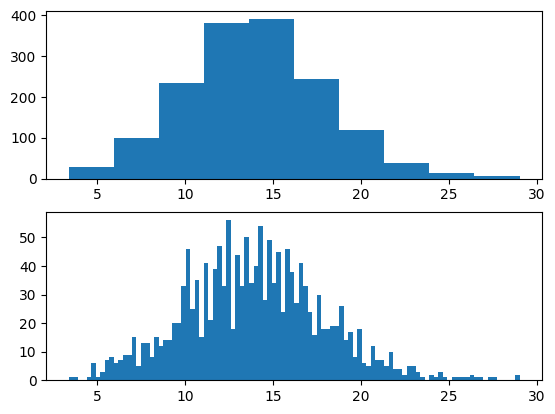

In [65]:
plt.subplot(2,1,1)
plt.hist(_final_df.College_Points_pergame)
plt.subplot(2,1,2)
plt.hist(_final_df.College_Points_pergame,bins=100);

Text(0.5, 1.0, 'PPG vs VORP')

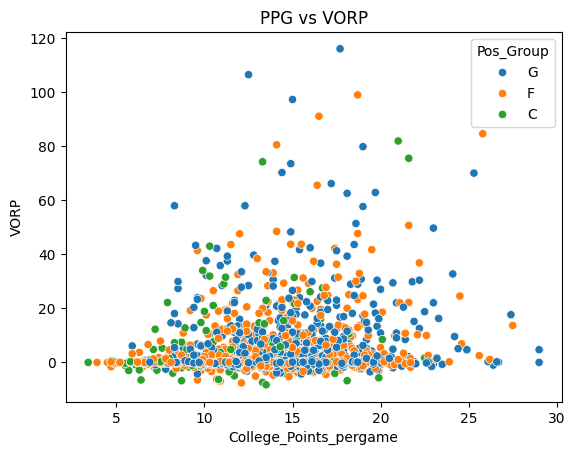

In [66]:
sns.scatterplot(_final_df,x='College_Points_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs VORP')

Text(0.5, 1.0, 'PPG vs WS')

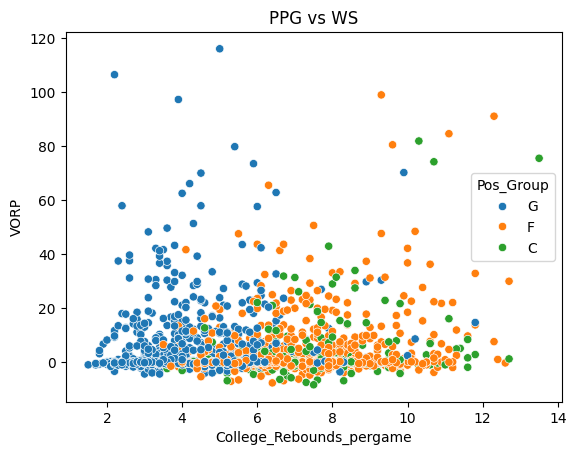

In [67]:
sns.scatterplot(_final_df,x='College_Rebounds_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')

<Axes: xlabel='height', ylabel='Count'>

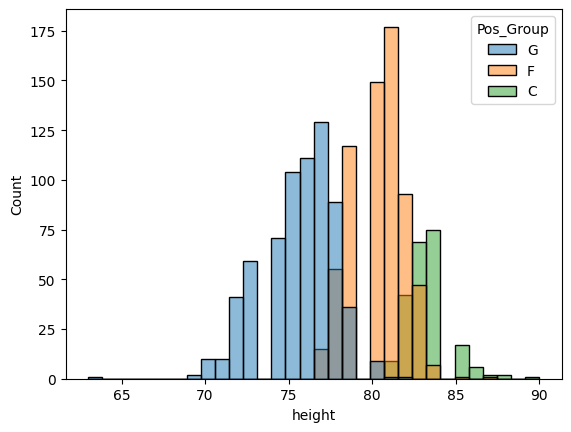

In [68]:
sns.histplot(_final_df,x='height',hue='Pos_Group')

Text(0.5, 1.0, 'PPG vs WS')

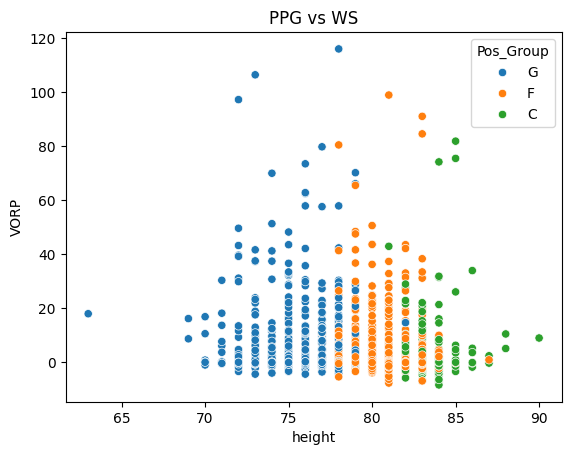

In [69]:
sns.scatterplot(_final_df,x='height',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')


<ipython-input-70-f7d3b1180e87>:14: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



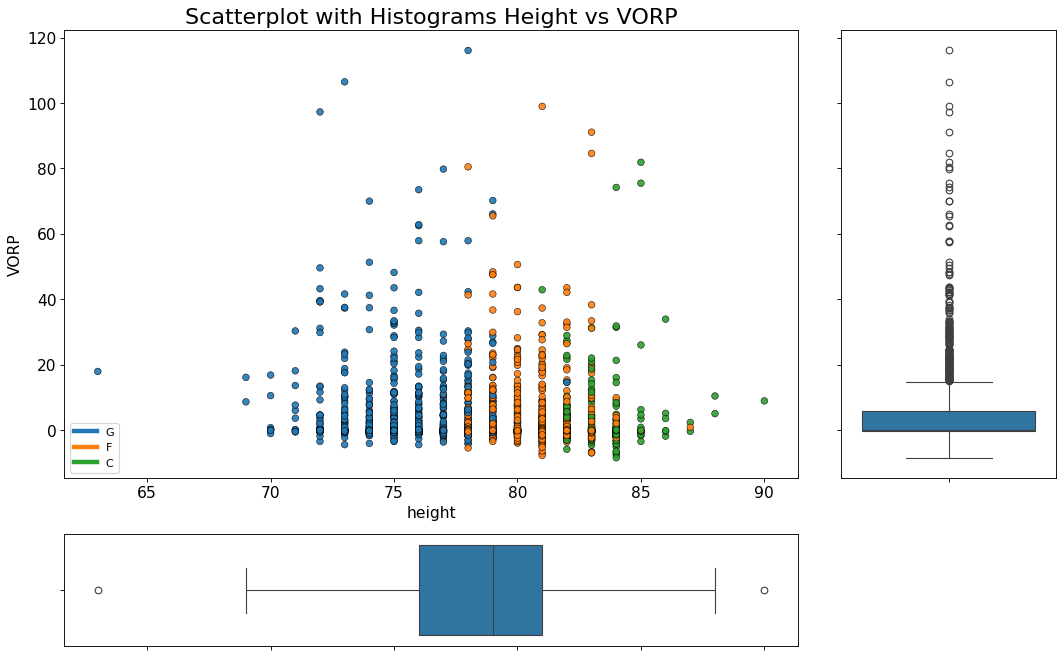

In [70]:
# Making a graph in order to put in the PowerPoint Presentation
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes and color
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])
my_color=np.where(_final_df['Pos_Group']=='G',"#1f77b4",
                  np.where(_final_df['Pos_Group']=='F',"#ff7f0e",
                           np.where(_final_df['Pos_Group']=='C',"#2ca02c","#a05195")))

# Scatterplot on main ax
ax_main.scatter('height', 'VORP', c=my_color, alpha=.9, data=_final_df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(_final_df.VORP, ax=ax_right, orient="v")
sns.boxplot(_final_df.height, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms Height vs VORP', xlabel='height', ylabel='VORP')

custom_lines = [Line2D([0], [0], color="#1f77b4", lw=4),
                Line2D([0], [0], color="#ff7f0e", lw=4),
                Line2D([0], [0], color="#2ca02c", lw=4)]
ax_main.legend(custom_lines, ['G', 'F', 'C'], loc='lower left')



# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

Text(0.5, 1.0, 'PPG vs WS')

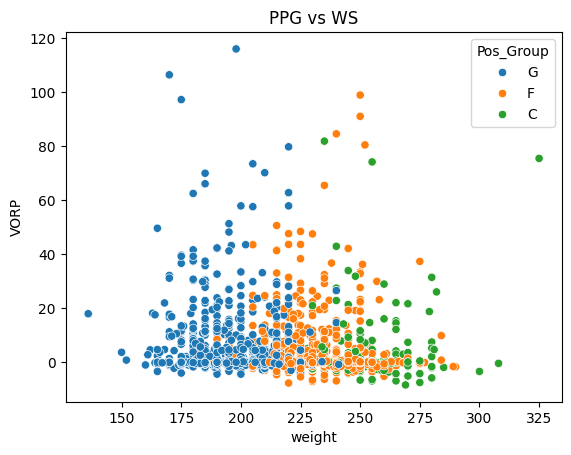

In [71]:
sns.scatterplot(_final_df,x='weight',y='VORP',hue='Pos_Group')
plt.title('PPG vs WS')

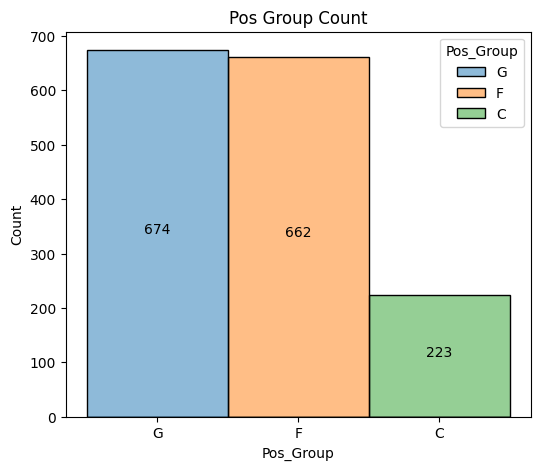

In [72]:
# plot histogram to put in the PPT
fig = plt.figure(figsize=(6,5))
ax = sns.histplot(_final_df,x='Pos_Group',hue='Pos_Group')
ax.set(title='Pos Group Count')

# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

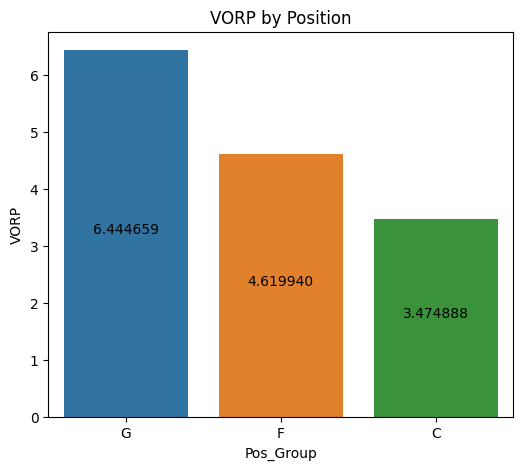

In [73]:
fig = plt.figure(figsize=(6,5))
ax = sns.barplot(_final_df,x='Pos_Group',y='VORP',hue='Pos_Group',estimator='mean',errorbar=None)
ax.set(title='VORP by Position')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

In [74]:
top_x = (_final_df['College'].value_counts()).iloc[:25]
top_x_df=top_x.reset_index()
top_x.columns = ['College', 'Count']
pd.set_option('display.max_rows', None)
all=_final_df.groupby('College')['VORP'].mean()
all_df=all.reset_index()
all.sort_values(ascending=False)
top_x_df = top_x_df.merge(all_df, on='College', how='left')
# Making a top 25 list of colleges to make an easier graphic

In [75]:
vorp_description=_final_df['VORP'].describe()

In [76]:
vorp_description

count    1559.000000
mean        5.245029
std        12.602910
min        -8.500000
25%        -0.400000
50%         0.000000
75%         5.750000
max       116.100000
Name: VORP, dtype: float64

In [77]:
vorp_description[4]

<ipython-input-77-c156ac89697a>:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



-0.4

In [78]:
vorp=top_x_df["VORP"]
cond_list = [vorp <0 , vorp < 3, vorp < 6, vorp >= 6]
choice_list = ["Low Vorp", "Mid Vorp", "Good Vorp", "Great Vorp"]
# making a tier vorp list based on the description of the vorp above

In [79]:
top_x_df['VORP Group']=np.select(cond_list, choice_list)

In [80]:
top_x_df

College  count       VORP  VORP Group
0         Kentucky     55   5.278182   Good Vorp
1             Duke     47   6.929787  Great Vorp
2             UCLA     46   6.780435  Great Vorp
3              UNC     42  10.521429  Great Vorp
4          Arizona     38   6.302632  Great Vorp
5           Kansas     35   4.828571   Good Vorp
6         Syracuse     31   2.474194    Mid Vorp
7         Michigan     29   4.168966   Good Vorp
8       Louisville     28   2.500000    Mid Vorp
9            UConn     27   8.444444  Great Vorp
10    Georgia Tech     27   7.196296  Great Vorp
11  Michigan State     26   4.619231   Good Vorp
12         Indiana     26   2.715385    Mid Vorp
13        Maryland     26   2.169231    Mid Vorp
14             LSU     22   4.854545   Good Vorp
15       Villanova     22   5.495455   Good Vorp
16           Texas     21   7.719048  Great Vorp
17   Florida State     20   3.040000   Good Vorp
18      Washington     19   5.152632   Good Vorp
19      Iowa State     19   3.105263   Good Vorp
20      Ohio State     18   5.800000   Good Vorp
21        NC State     18   2.927778    Mid Vorp
22      Georgetown     18   8.683333  Great Vorp
23         Florida     18   8.872222  Great Vorp
24         Memphis     18   3.488889   Good Vorp

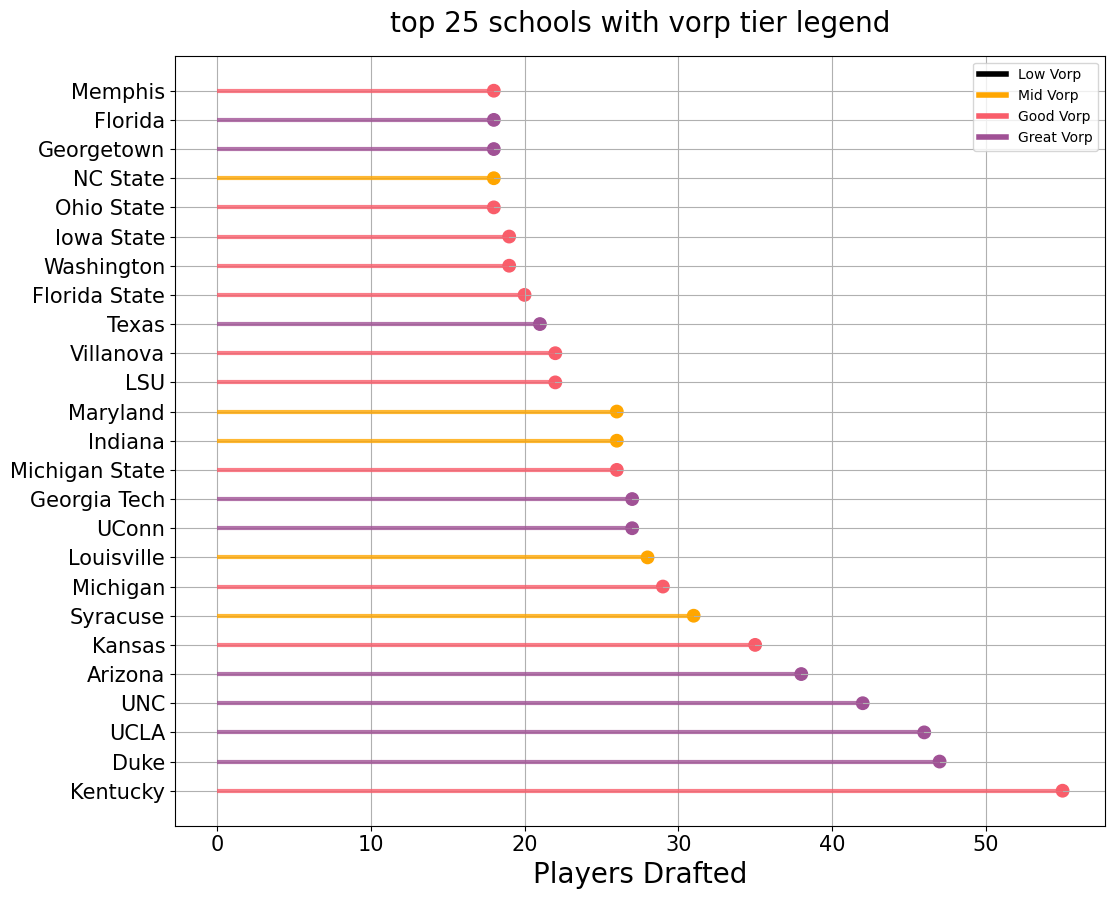

In [81]:
fig = plt.figure(figsize=(12,10))

list_ordering = ['Low Vorp','Mid Vorp','Good Vorp','Great Vorp']
my_range=range(0,len(top_x_df))
my_color=np.where(top_x_df['VORP Group']=='Low Vorp',"#0",
                  np.where(top_x_df['VORP Group']=='Mid Vorp',"#ffa600",
                           np.where(top_x_df['VORP Group']=='Good Vorp',"#f95d6a","#a05195")))

plt.hlines(y=top_x_df['College'], xmin=0, xmax=top_x_df['count'], color=my_color,linewidth=3, alpha =0.8)
plt.scatter(top_x_df['count'], my_range, color=my_color, s=80, alpha=1)
plt.title("top 25 schools with vorp tier legend", fontsize=20, x=0.5,y=1.02)
plt.xlabel('Players Drafted', fontsize=20)
plt.ylabel('',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid()
custom_lines = [Line2D([0], [0], color="Black", lw=4),
                Line2D([0], [0], color="#ffa600", lw=4),
                Line2D([0], [0], color="#f95d6a", lw=4),
                Line2D([0], [0], color="#a05195", lw=4)]
plt.legend(custom_lines, ['Low Vorp', 'Mid Vorp', 'Good Vorp','Great Vorp'], loc='upper right')
#plb.savefig('Lollipo_Score',dpi=100,bbox_inches='tight')

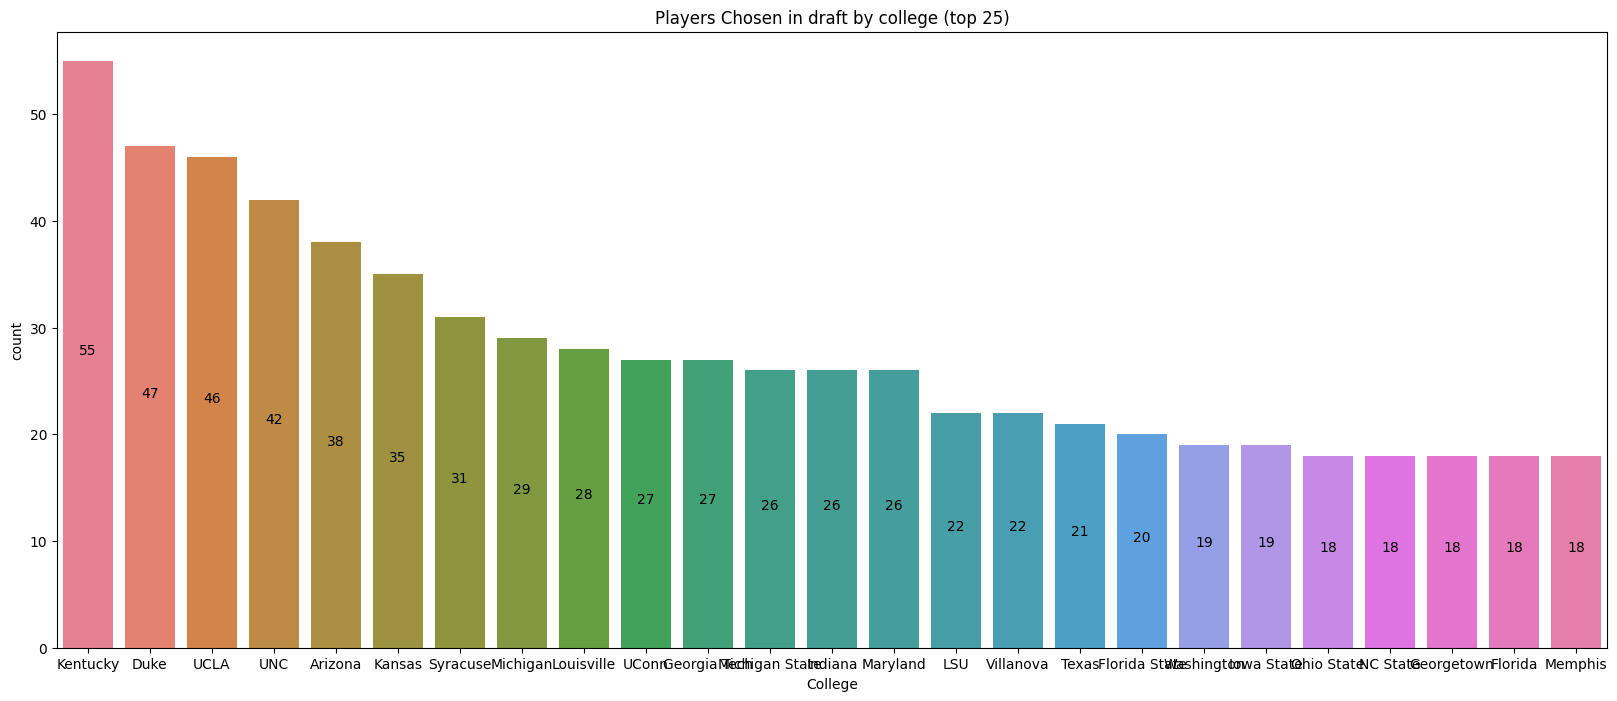

In [82]:
plt.figure(figsize=(20,8))
ax = sns.barplot(top_x_df,x='College',y='count',hue='College',errorbar=None)
ax.set(title='Players Chosen in draft by college (top 25)')
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    if height != 0:
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
        y = height/2, # y-coordinate position of data label, padded 0.2 above bar
        s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
        ha = 'center') # sets horizontal alignment (ha) to center

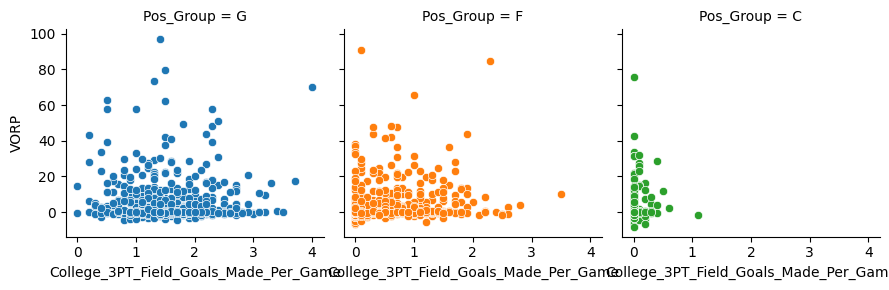

In [83]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_3PT_Field_Goals_Made_Per_Game", "VORP")

Text(0.5, 1.0, 'PPG vs MPG')

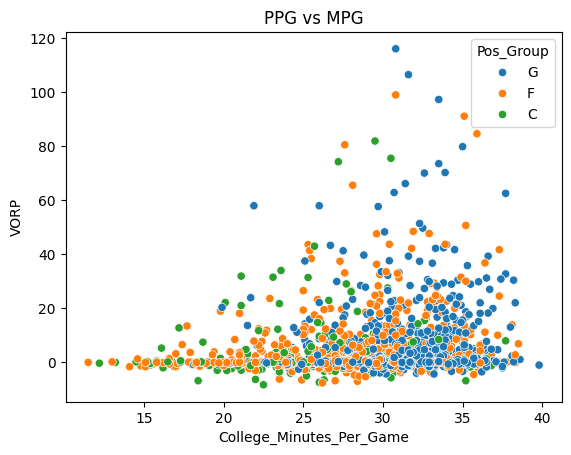

In [84]:
sns.scatterplot(_final_df,x='College_Minutes_Per_Game',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

In [85]:
import plotly.express as px
bins = [65, 70, 75, 80, 85, 90,95]
_final_df['binned height'] = pd.cut(_final_df['height'], bins)



In [86]:
pd.set_option('display.max_rows', None)
_final_df

index                  Player_x       College_Season  \
42       57              Mark Aguirre               Career   
43       58              Isiah Thomas               Career   
44       59             Buck Williams               Career   
45       60                   Al Wood               Career   
46       61              Danny Vranes               Career   
47       62         Orlando Woolridge               Career   
48       64              Tom Chambers               Career   
49       65          Rolando Blackman               Career   
50       66               Albert King               Career   
51       67             Frank Johnson               Career   
52       68            Kelly Tripucka               Career   
54       70             Herb Williams               Career   
55       71                 Jeff Lamp               Career   
56       72         Darnell Valentine               Career   
57       73               Ray Tolbert               Career   
58       74                Mike McGee               Career   
59       75               Larry Nance               Career   
60       76              Alton Lister               Career   
61       77          Franklin Edwards               Career   
62       78               Jay Vincent               Career   
63       79             Tracy Jackson               Career   
64       81               Howard Wood               Career   
65       82                Gene Banks               Career   
66       85                  Ed Rains               Career   
67       86               Danny Ainge               Career   
68       90             Charles Davis               Career   
69       91                 Ray Blume               Career   
70       96            Claude Gregory               Career   
71       98             Elston Turner               Career   
72      103               David Burns               Career   
73      106              Rudy Macklin               Career   
74      107              Mark Radford               Career   
75      108                 Jim Smith               Career   
76      109            Mickey Dillard               Career   
77      111          Frank Brickowski               Career   
78      115              James Worthy               Career   
79      116            Terry Cummings               Career   
80      117         Dominique Wilkins               Career   
81      118              Bill Garnett               Career   
82      119          LaSalle Thompson               Career   
83      120              Trent Tucker               Career   
84      121            Quintin Dailey               Career   
85      122             Clark Kellogg               Career   
86      123          Cliff Levingston               Career   
87      124            Keith Edmonson               Career   
88      125                 Fat Lever               Career   
89      126               John Bagley               Career   
90      127              Sleepy Floyd               Career   
91      128             Lester Conner               Career   
92      129           David Thirdkill               Career   
93      130              Terry Teagle               Career   
94      131              Brook Steppe               Career   
95      132              Ricky Pierce               Career   
96      133              Rob Williams               Career   
97      134              Paul Pressey               Career   
98      135            Eddie Phillips               Career   
99      136             Mark McNamara           California   
101     138           Oliver Robinson               Career   
102     139             Bryan Warrick               Career   
103     141              Fred Roberts               Career   
104     142            Scott Hastings               Career   
105     143            Wallace Bryant               Career   
106     144               Rod Higgins               Career   
107     145          Richard Anderson 

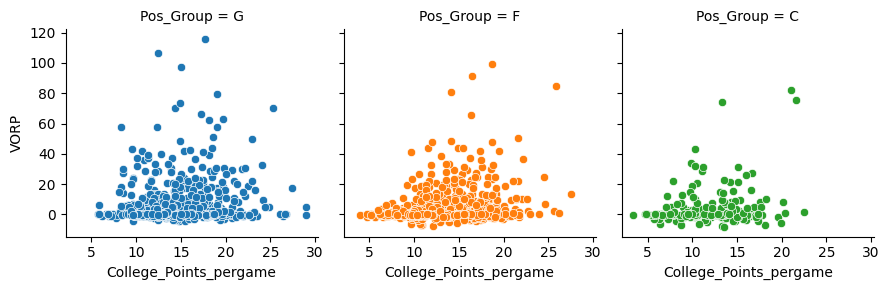

In [87]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Points_pergame", "VORP")


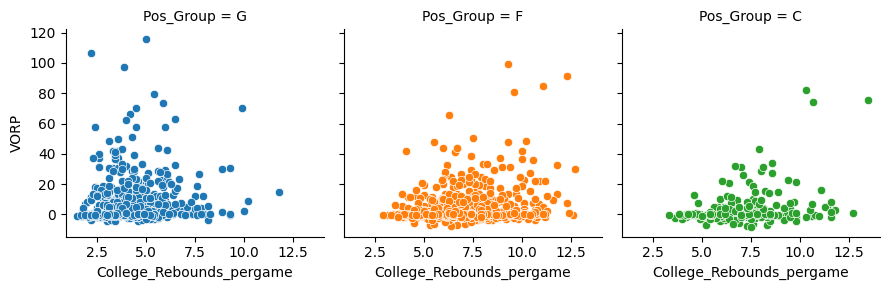

In [88]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Rebounds_pergame", "VORP")

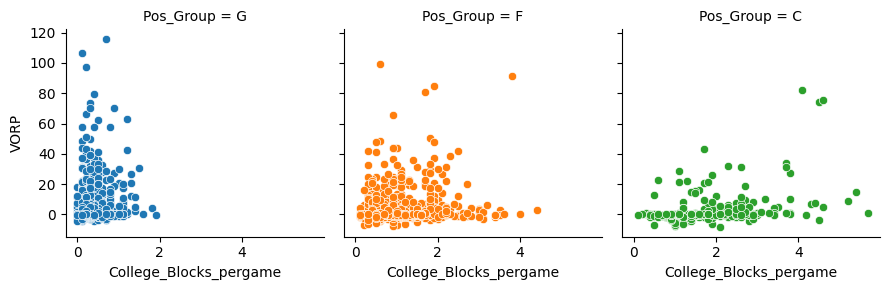

In [89]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Blocks_pergame", "VORP",)

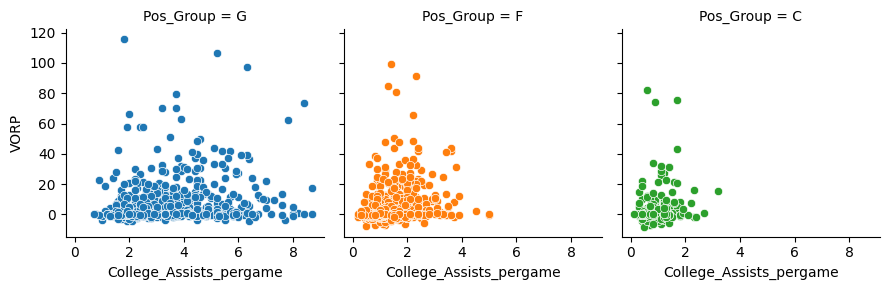

In [90]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Assists_pergame", "VORP",)

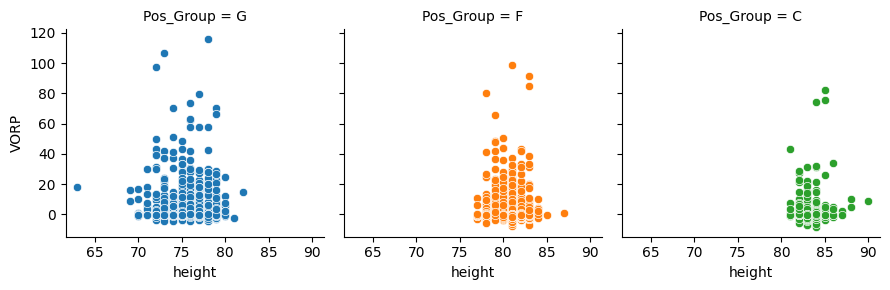

In [91]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'height','VORP')


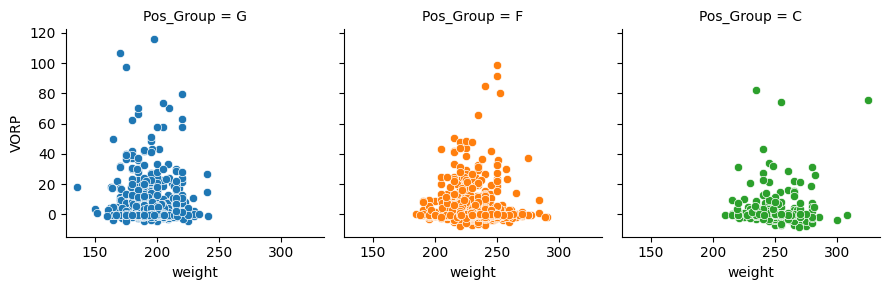

In [92]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'weight','VORP')

Text(0.5, 1.0, 'PPG vs MPG')

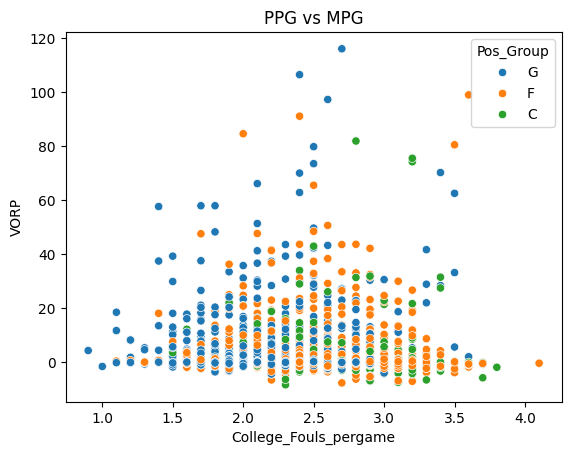

In [93]:
sns.scatterplot(_final_df,x='College_Fouls_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

Text(0.5, 1.0, 'PPG vs MPG')

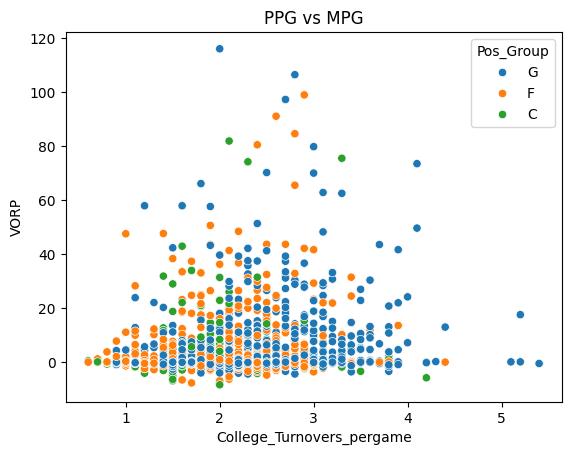

In [94]:
sns.scatterplot(_final_df,x='College_Turnovers_pergame',y='VORP',hue='Pos_Group')
plt.title('PPG vs MPG')

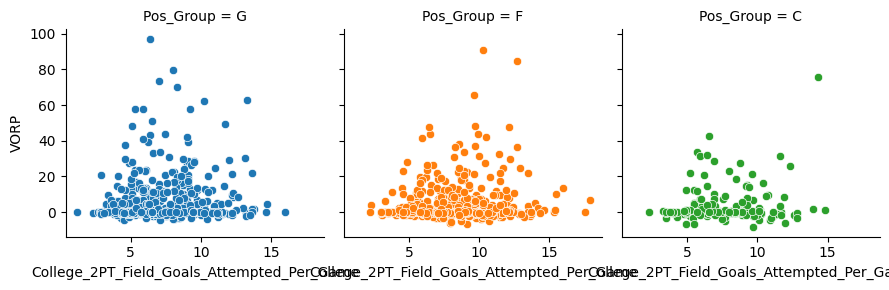

In [95]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, 'College_2PT_Field_Goals_Attempted_Per_Game','VORP')



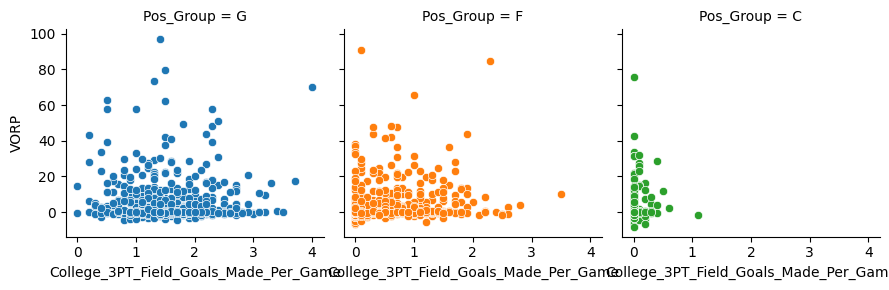

In [96]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_3PT_Field_Goals_Made_Per_Game", "VORP")



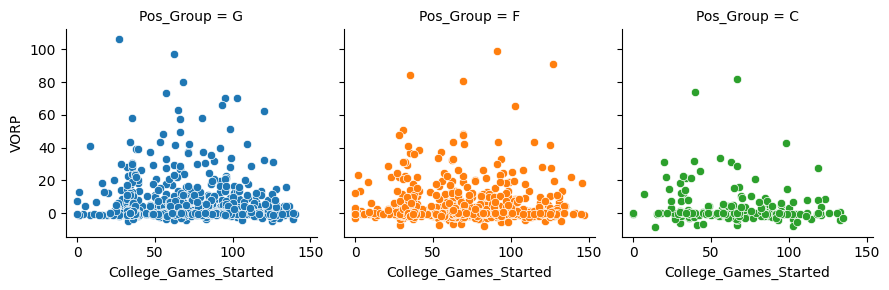

In [97]:
g = sns.FacetGrid(_final_df, col="Pos_Group",hue='Pos_Group')
g.map(sns.scatterplot, "College_Games_Started", "VORP")


Limpieza de Columnas no utilizadas para la preddicion

In [98]:
_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1559 entries, 42 to 1606
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   index                                       1559 non-null   int64         
 1   Player_x                                    1559 non-null   object        
 2   College_Season                              1559 non-null   object        
 3   College                                     1559 non-null   object        
 4   College_Games_Played                        1559 non-null   int64         
 5   College_Games_Started                       1493 non-null   float64       
 6   College_Field_Goals_Made_Per_Game           1559 non-null   float64       
 7   College_Field_Goals_Attempted_Per_Game      1559 non-null   float64       
 8   College_FG%                                 1559 non-null   float64       
 9   College_2PT_

In [99]:
_final_prediction = _final_df.drop(['index', 'Pk','Yrs',
       'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%',
       'Nba_Minutes_Per_Game', 'Nba_Pts_Per_Game', 'Nba_Rebounds_Per_Game',
       'Nba_Ast_Per_Game', 'WS', 'WS/48', 'BPM', 'year_min',
       'year_max','birth_date','Tm','pos','height','weight',
       'College_Games_Played','College_Games_Started'
                                    ], axis=1).reset_index(drop=True,inplace=False)


In [100]:
#quiero eliminar las filas que tienen temporada universitaria que no diga Career

_final_prediction = _final_prediction[_final_prediction['College_Season'] == 'Career']
_final_prediction = _final_prediction.drop(['College_Season'], axis=1)


<Axes: >

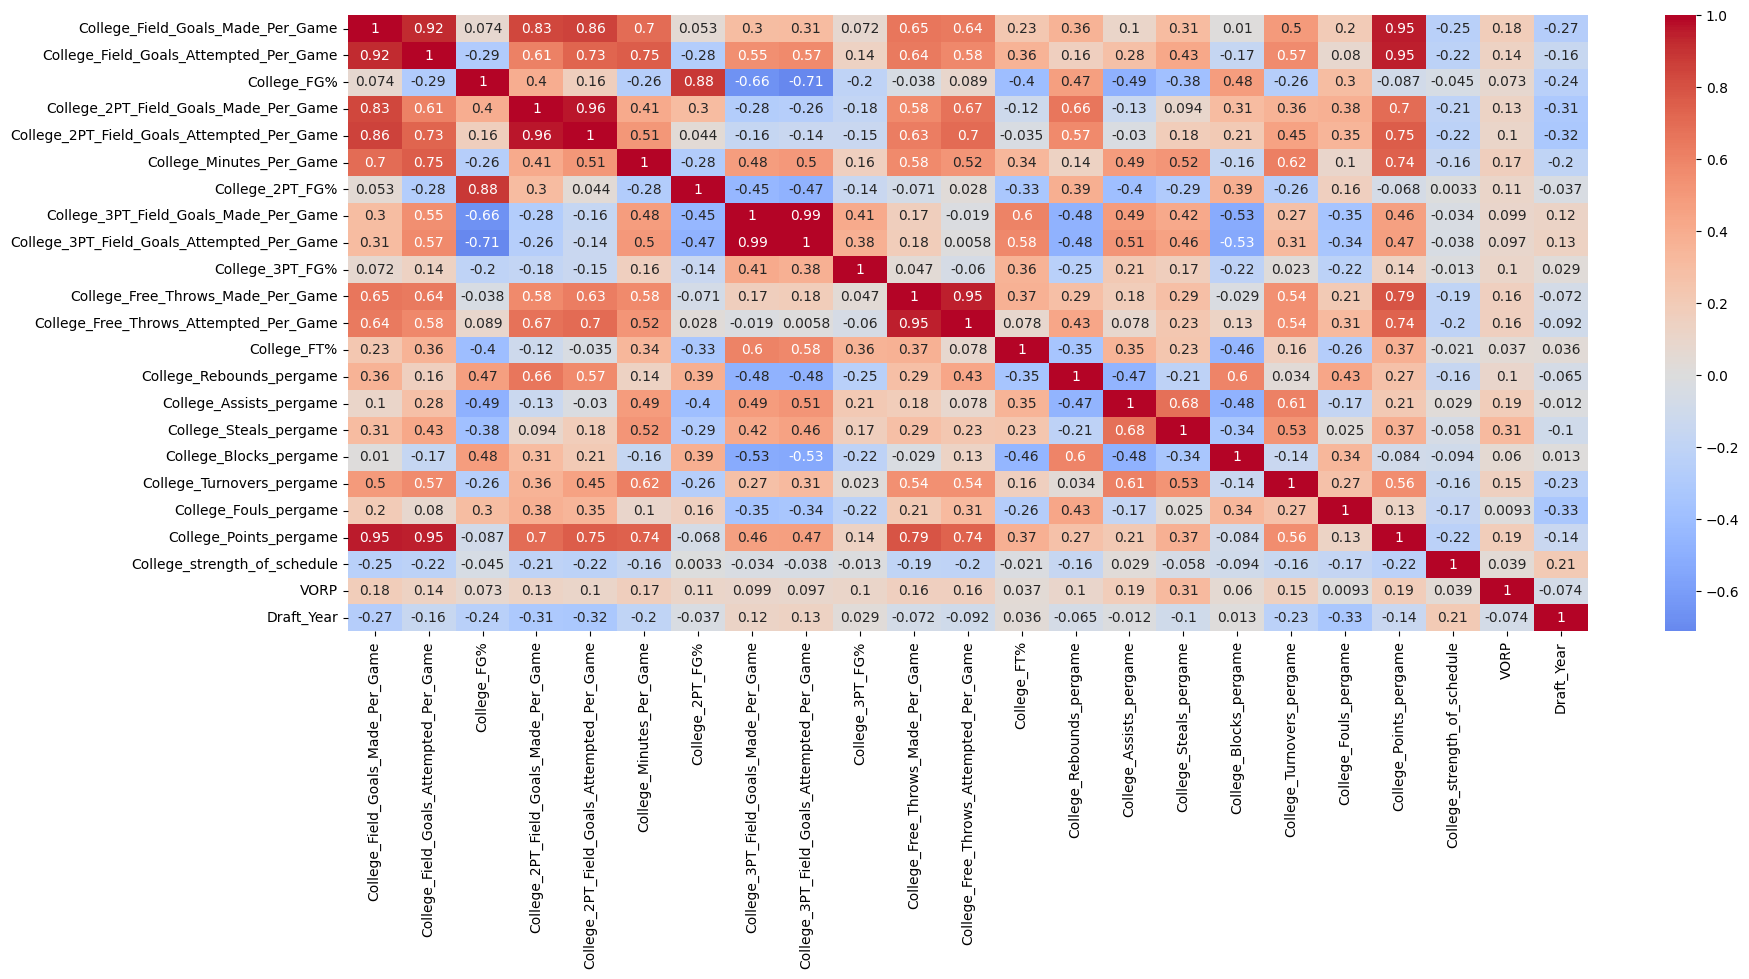

In [101]:
plt.figure(figsize=(20,8))
correlation_matrix = _final_prediction.corr(numeric_only=True)
# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

In [102]:
_final_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1456 entries, 0 to 1558
Data columns (total 27 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   Player_x                                    1456 non-null   object  
 1   College                                     1456 non-null   object  
 2   College_Field_Goals_Made_Per_Game           1456 non-null   float64 
 3   College_Field_Goals_Attempted_Per_Game      1456 non-null   float64 
 4   College_FG%                                 1456 non-null   float64 
 5   College_2PT_Field_Goals_Made_Per_Game       1112 non-null   float64 
 6   College_2PT_Field_Goals_Attempted_Per_Game  1112 non-null   float64 
 7   College_Minutes_Per_Game                    1456 non-null   float64 
 8   College_2PT_FG%                             1273 non-null   float64 
 9   College_3PT_Field_Goals_Made_Per_Game       1112 non-null   float64 
 10  Colle

In [103]:
pd.set_option('display.max_rows', None)
_final_prediction.isnull().sum(axis = 0)

Player_x                                        0
College                                         0
College_Field_Goals_Made_Per_Game               0
College_Field_Goals_Attempted_Per_Game          0
College_FG%                                     0
College_2PT_Field_Goals_Made_Per_Game         344
College_2PT_Field_Goals_Attempted_Per_Game    344
College_Minutes_Per_Game                        0
College_2PT_FG%                               183
College_3PT_Field_Goals_Made_Per_Game         344
College_3PT_Field_Goals_Attempted_Per_Game    344
College_3PT_FG%                               291
College_Free_Throws_Made_Per_Game               0
College_Free_Throws_Attempted_Per_Game          0
College_FT%                                     0
College_Rebounds_pergame                        0
College_Assists_pergame                         6
College_Steals_pergame                         16
College_Blocks_pergame                         22
College_Turnovers_pergame                      63


In [104]:
pd.set_option('display.max_rows', 20)

_final_prediction

Player_x          College  \
0              Mark Aguirre           DePaul   
1              Isiah Thomas          Indiana   
2             Buck Williams         Maryland   
3                   Al Wood              UNC   
4              Danny Vranes             Utah   
...                     ...              ...   
1553        Jalen McDaniels  San Diego State   
1554  Justin Wright-Foreman          Hofstra   
1556               Kyle Guy         Virginia   
1557            Jordan Bone        Tennessee   
1558               Miye Oni             Yale   

      College_Field_Goals_Made_Per_Game  \
0                                   9.7   
1                                   5.8   
2                                   5.2   
3                                   6.5   
4                                   5.8   
...                                 ...   
1553                                5.0   
1554                                6.6   
1556                                4.4   
1557                                3.6   
1558                                5.2   

      College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                       17.8        0.546   
1                                       10.9        0.534   
2                                        8.5        0.615   
3                                       11.7        0.560   
4                                        9.9        0.584   
...                                      ...          ...   
1553                                    10.0        0.504   
1554                                    13.6        0.483   
1556                                    10.1        0.433   
1557                                     8.4        0.424   
1558                                    12.1        0.428   

      College_2PT_Field_Goals_Made_Per_Game  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
1553                                    4.6   
1554                                    4.3   
1556                                    2.0   
1557                                    2.6   
1558                                    3.2   

      College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                            NaN                      37.3   
1                                            NaN                      34.5   
2                                            NaN                      33.2   
3                                            NaN                      33.1   
4                                            NaN                      31.1   
...                                          ...                       ...   
1553                                         8.6                      27.9   
1554                                         7.8                      28.1   
1556                                         4.5                      29.1   
1557                                         5.7                      26.1   
1558                                         6.5                      31.7   

      College_2PT_FG%  College_3PT_Field_Goals_Made_Per_Game  \
0                 NaN                                    NaN   
1                 NaN                                    NaN   
2                 NaN                                    NaN   
3                 NaN                                    NaN   
4                 NaN                                    NaN   
...               ...                                    ...   
1553            0.538                                    0.4   
1554            0.555                                    2.2   
1556            0.444                                    2.4   
1557            0.458                             

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

In [107]:
x_train = _final_prediction[_final_prediction['Draft_Year'].isin([1980,1981,1982,1983,
                                                                  1985,1986,1987,1988,1989,1990,1991,1992,1993,
                                                                  1995,1996,1997,1998,1999,2000,2001,2002,2003,
                                                                  2005,2006,2007,2008,2009,2010,2011,2012,2013,
                                                                  2015,2016,2017])]
x_test = _final_prediction[_final_prediction['Draft_Year'].isin([1984,1994,2004,2014,2018])]
x_train=x_train.set_index('Player_x')
x_test=x_test.set_index('Player_x')

In [108]:
y_train=x_train['VORP']
y_test = x_test['VORP']
x_train = x_train.drop(['Draft_Year','VORP','College','Pos_Group','binned height'],axis=1)
x_test =x_test.drop(['Draft_Year','VORP','College','Pos_Group','binned height'],axis=1)

In [109]:
x_train

College_Field_Goals_Made_Per_Game  \
Player_x                                               
Mark Aguirre                                     9.7   
Isiah Thomas                                     5.8   
Buck Williams                                    5.2   
Al Wood                                          6.5   
Danny Vranes                                     5.8   
...                                              ...   
Edmond Sumner                                    3.5   
Kadeem Allen                                     3.0   
Alec Peters                                      5.9   
Jabari Bird                                      3.9   
Jaron Blossomgame                                4.9   

                   College_Field_Goals_Attempted_Per_Game  College_FG%  \
Player_x                                                                 
Mark Aguirre                                         17.8        0.546   
Isiah Thomas                                         10.9        0.534   
Buck Williams                                         8.5        0.615   
Al Wood                                              11.7        0.560   
Danny Vranes                                          9.9        0.584   
...                                                   ...          ...   
Edmond Sumner                                         8.2        0.429   
Kadeem Allen                                          6.6        0.459   
Alec Peters                                          12.1        0.487   
Jabari Bird                                           8.9        0.442   
Jaron Blossomgame                                    10.0        0.488   

                   College_2PT_Field_Goals_Made_Per_Game  \
Player_x                                                   
Mark Aguirre                                         NaN   
Isiah Thomas                                         NaN   
Buck Williams                                        NaN   
Al Wood                                              NaN   
Danny Vranes                                         NaN   
...                                                  ...   
Edmond Sumner                                        2.9   
Kadeem Allen                                         2.3   
Alec Peters                                          3.7   
Jabari Bird                                          2.3   
Jaron Blossomgame                                    4.1   

                   College_2PT_Field_Goals_Attempted_Per_Game  \
Player_x                                                        
Mark Aguirre                                              NaN   
Isiah Thomas                                              NaN   
Buck Williams                                             NaN   
Al Wood                                                   NaN   
Danny Vranes                                              NaN   
...                                                       ...   
Edmond Sumner                                             6.0   
Kadeem Allen                                              4.8   
Alec Peters                                               6.9   
Jabari Bird                                               4.5   
Jaron Blossomgame                                         7.7   

                   College_Minutes_Per_Game  College_2PT_FG%  \
Player_x                                                       
Mark Aguirre                           37.3              NaN   
Isiah Thomas                           34.5              NaN   
Buck Williams                          33.2              NaN   
Al Wood                                33.1              NaN   
Danny Vranes                           31.1              NaN   
...                                     ...              ...   
Edmond Sumner                          26.6            0.483   
Kadeem Allen                           27.5            0.482   
Alec Peters                            31.7            0.539

In [110]:
x_test

College_Field_Goals_Made_Per_Game  \
Player_x                                                  
Hakeem Olajuwon                                     5.3   
Sam Bowie                                           5.0   
Michael Jordan                                      7.1   
Sam Perkins                                         5.8   
Charles Barkley                                     5.6   
...                                                 ...   
Devon Hall                                          2.4   
Kevin Hervey                                        5.5   
Thomas Welsh                                        4.0   
George King                                         3.5   
Kostas Antetokounmpo                                2.0   

                      College_Field_Goals_Attempted_Per_Game  College_FG%  \
Player_x                                                                    
Hakeem Olajuwon                                          8.3        0.639   
Sam Bowie                                                9.6        0.522   
Michael Jordan                                          13.2        0.540   
Sam Perkins                                             10.1        0.576   
Charles Barkley                                          8.9        0.626   
...                                                      ...          ...   
Devon Hall                                               5.7        0.419   
Kevin Hervey                                            12.5        0.440   
Thomas Welsh                                             7.5        0.537   
George King                                              7.9        0.444   
Kostas Antetokounmpo                                     3.5        0.574   

                      College_2PT_Field_Goals_Made_Per_Game  \
Player_x                                                      
Hakeem Olajuwon                                         NaN   
Sam Bowie                                               NaN   
Michael Jordan                                          NaN   
Sam Perkins                                             NaN   
Charles Barkley                                         NaN   
...                                                     ...   
Devon Hall                                              1.5   
Kevin Hervey                                            3.7   
Thomas Welsh                                            3.7   
George King                                             2.1   
Kostas Antetokounmpo                                    1.9   

                      College_2PT_Field_Goals_Attempted_Per_Game  \
Player_x                                                           
Hakeem Olajuwon                                              NaN   
Sam Bowie                                                    NaN   
Michael Jordan                                               NaN   
Sam Perkins                                                  NaN   
Charles Barkley                                              NaN   
...                                                          ...   
Devon Hall                                                   3.4   
Kevin Hervey                                                 7.0   
Thomas Welsh                                                 6.6   
George King                                                  4.3   
Kostas Antetokounmpo                                         3.0   

                      College_Minutes_Per_Game  College_2PT_FG%  \
Player_x                                                          
Hakeem Olajuwon                           27.2              NaN   
Sam Bowie                                 28.8              NaN   
Michael Jordan                            30.8            0.550   
Sam Perkins                               33.0            0.534   
Charles Barkley                           27.6              NaN   
...                                        ...              ...   
Devon Hall 

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler

In [112]:
rf = RandomForestRegressor()

In [113]:
# Impute NaN values using SimpleImputer
import pandas as pd
from sklearn.impute import SimpleImputer

# Uso el metodo de la media
imputer_numeric = SimpleImputer(strategy='mean')
numeric_columns = x_train.select_dtypes(include=['number']).columns
x_train[numeric_columns] = imputer_numeric.fit_transform(x_train[numeric_columns])
x_test[numeric_columns] = imputer_numeric.transform(x_test[numeric_columns])


#Generamos la prediccion
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [114]:
pred = rf.predict(x_test)
performance = r2_score(y_test, y_pred)
print(performance)

0.2153316592471315


In [115]:
len(pred)

172

In [116]:
x_test=x_test.reset_index()
x_train=x_train.reset_index()

In [117]:
x_test

Player_x  College_Field_Goals_Made_Per_Game  \
0         Hakeem Olajuwon                                5.3   
1               Sam Bowie                                5.0   
2          Michael Jordan                                7.1   
3             Sam Perkins                                5.8   
4         Charles Barkley                                5.6   
..                    ...                                ...   
167            Devon Hall                                2.4   
168          Kevin Hervey                                5.5   
169          Thomas Welsh                                4.0   
170           George King                                3.5   
171  Kostas Antetokounmpo                                2.0   

     College_Field_Goals_Attempted_Per_Game  College_FG%  \
0                                       8.3        0.639   
1                                       9.6        0.522   
2                                      13.2        0.540   
3                                      10.1        0.576   
4                                       8.9        0.626   
..                                      ...          ...   
167                                     5.7        0.419   
168                                    12.5        0.440   
169                                     7.5        0.537   
170                                     7.9        0.444   
171                                     3.5        0.574   

     College_2PT_Field_Goals_Made_Per_Game  \
0                                 4.081023   
1                                 4.081023   
2                                 4.081023   
3                                 4.081023   
4                                 4.081023   
..                                     ...   
167                               1.500000   
168                               3.700000   
169                               3.700000   
170                               2.100000   
171                               1.900000   

     College_2PT_Field_Goals_Attempted_Per_Game  College_Minutes_Per_Game  \
0                                      7.756716                      27.2   
1                                      7.756716                      28.8   
2                                      7.756716                      30.8   
3                                      7.756716                      33.0   
4                                      7.756716                      27.6   
..                                          ...                       ...   
167                                    3.400000                      24.0   
168                                    7.000000                      27.7   
169                                    6.600000                      25.0   
170                                    4.300000                      22.6   
171                                    3.000000                      15.1   

     College_2PT_FG%  College_3PT_Field_Goals_Made_Per_Game  \
0           0.526459                               0.862154   
1           0.526459                               0.862154   
2           0.550000                               0.862154   
3           0.534000                               0.862154   
4           0.526459                               0.862154   
..               ...                                    ...   
167         0.440000                               0.900000   
168         0.530000                               1.800000   
169         0.554000                               0.300000   
170         0.478000                               1.400000   
171         0.651000                               0.100000   

     College_3PT_Field_Goals_Attempted_Per_Game  College_3PT_FG%  \
0                                      2.369616         0.327973   
1                                      2.369616         0.327973   
2                                      2.369616         0.447000   
3                   

In [118]:
Results=pd.DataFrame()
Results['Player_x']=x_test['Player_x']
Results['VORP_Pred']=y_pred
Results.set_index('Player_x')

VORP_Pred
Player_x                       
Hakeem Olajuwon          23.956
Sam Bowie                 2.491
Michael Jordan           10.996
Sam Perkins               3.991
Charles Barkley          13.657
...                         ...
Devon Hall                5.998
Kevin Hervey              3.049
Thomas Welsh              4.725
George King               0.041
Kostas Antetokounmpo      3.172

[172 rows x 1 columns]

In [119]:
Results=Results.merge(_final_df,how='left',on='Player_x')

In [120]:
pd.set_option('display.max_rows', 20)


In [121]:
import plotly.graph_objects as go
fig= go.Figure([
    go.Scatter(x=Results['Player_x'], y = Results['VORP'], name='VORP',mode='markers'),
    go.Scatter(x=Results['Player_x'], y=Results['VORP_Pred'], name='Predicted VORP')
])
fig.show()

In [122]:
x_train=x_train.set_index('Player_x')
x_test=x_test.set_index('Player_x')

In [123]:
rf.score(x_test,y_test)


0.2153316592471315

In [124]:
x_test=x_test.reset_index()
x_train=x_train.reset_index()

In [125]:


X_train = _final_prediction[_final_prediction['Draft_Year'].isin([1980,1981,1982,1983,
                                                                  1985,1986,1987,1988,1989,1990,1991,1992,1993,
                                                                  1995,1996,1997,1998,1999,2000,2001,2002,2003,
                                                                  2005,2006,2007,2008,2009,2010,2011,2012,2013,
                                                                  2015,2016,2017])]
X_test = _final_prediction[_final_prediction['Draft_Year'].isin([1984,1994,2004,2014,2018])]
Y_train=X_train['VORP']
Y_test = X_test['VORP']

X_train = X_train.drop(['Draft_Year','VORP','College','binned height'],axis=1)
X_test =X_test.drop(['Draft_Year','VORP','College','binned height'],axis=1)


X_train=X_train.set_index('Player_x')
X_test=X_test.set_index('Player_x')




In [126]:
lista_numeric_features = _final_prediction.select_dtypes(include=['int64', 'float64']).drop(['VORP','Draft_Year'], axis=1).columns
lista_categorical_features = _final_prediction.select_dtypes(include=['object','category']).drop(['Player_x','College','binned height'], axis=1).columns

In [127]:
lista_numeric_features

Index(['College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_3PT_Field_Goals_Made_Per_Game',
       'College_3PT_Field_Goals_Attempted_Per_Game', 'College_3PT_FG%',
       'College_Free_Throws_Made_Per_Game',
       'College_Free_Throws_Attempted_Per_Game', 'College_FT%',
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule'],
      dtype='object')

In [128]:
lista_categorical_features

Index(['Pos_Group'], dtype='object')

In [129]:
test=SimpleImputer(strategy='most_frequent')

In [130]:
Vorp_test=test.fit_transform(_final_prediction[['VORP']])

In [131]:
Vorp_test[_final_prediction['VORP'].isna()]

array([], shape=(0, 1), dtype=float64)

In [132]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])


In [133]:
categorical_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='most_frequent')),
      ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [134]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, lista_numeric_features),
        ('cat', categorical_transformer, lista_categorical_features)])

In [135]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_Game', 'College_2PT_FG%',
       'College_...
       'College_Rebounds_pergame', 'College_Assists_pergame',
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Pos_Group'], dtype='object'))])

In [136]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestRegressor

In [137]:
pipe1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', LinearRegression())])



In [138]:
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['College_Field_Goals_Made_Per_Game',
       'College_Field_Goals_Attempted_Per_Game', 'College_FG%',
       'College_2PT_Field_Goals_Made_Per_Game',
       'College_2PT_Field_Goals_Attempted_Per_Game',
       'College_Minutes_Per_G...
       'College_Steals_pergame', 'College_Blocks_pergame',
       'College_Turnovers_pergame', 'College_Fouls_pergame',
       'College_Points_pergame', 'College_strength_of_schedule'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Pos_Group'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [139]:
pipe1.fit(X_train, Y_train);


In [140]:
prediction = pipe1.predict(X_test)

In [141]:
pipe1.score(X_test,Y_test)


0.2245592627451809

In [142]:
pipe1.predict(X_test)

array([21.76255771,  8.10323502, 12.80219449, 12.0175677 , 11.9212185 ,
        5.10161798, 12.19923243,  4.71244814,  0.34192646, -2.25485362,
       -2.84541985, 13.2989545 , 12.99116467, -3.09184912, 11.69537833,
       -6.43276612,  5.44568747,  3.60064987, -0.86295232,  4.92950419,
        4.40185593,  6.55528292,  2.65466066,  6.18944915,  0.16589963,
       -3.7505278 ,  6.55851343,  3.23056561,  2.08431074,  8.2860115 ,
        7.95985761, -2.62020629,  5.23419414, -6.91042006,  2.06869916,
       -1.95856031,  0.30633267, -3.81414099, 16.33409528, 30.64595031,
       12.58092839, 10.33214977, -1.54326899,  6.42008994,  6.76522497,
        3.84217503,  2.18111852, 11.52755124,  9.72982018,  5.39408383,
        3.66338448,  7.98166491, 11.94095205,  3.11079439,  1.42231805,
       -2.19929902,  2.59074697, 11.06841721,  2.440538  ,  8.64340452,
       13.70633093, -3.15216868,  2.43464261,  3.00971439,  2.51837676,
        3.99835777,  5.30347974,  3.38871679, -2.66713889, -1.18

In [143]:
regressors = [
    KNeighborsRegressor(3),
    KNeighborsRegressor(5),
    LinearRegression(),
    DecisionTreeRegressor(max_leaf_nodes=5),
    DecisionTreeRegressor(max_leaf_nodes=10),
    #GaussianNB(),
    RandomForestRegressor(),
    RandomForestRegressor(n_estimators=500, max_depth=10),
    RandomForestRegressor(n_estimators=500, max_depth=15),
    RandomForestRegressor(n_estimators=600, max_depth=10),
    RandomForestRegressor(n_estimators=600, max_depth=15),
    ]


for regressor in regressors:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', regressor)])

    print(regressor)
    pipe.fit(X_train, Y_train)
    r2 = pipe.score(X_test, Y_test)
    print("model score R2: %.3f" % r2)
    #print("model score: %.3f" % cross_val_score(pipe,X_train,Y_train,scoring='r2').mean())
    print()

KNeighborsRegressor(n_neighbors=3)
model score R2: 0.068

KNeighborsRegressor()
model score R2: 0.052

LinearRegression()
model score R2: 0.225

DecisionTreeRegressor(max_leaf_nodes=5)
model score R2: 0.058

DecisionTreeRegressor(max_leaf_nodes=10)
model score R2: -0.020

RandomForestRegressor()
model score R2: 0.195

RandomForestRegressor(max_depth=10, n_estimators=500)
model score R2: 0.199

RandomForestRegressor(max_depth=15, n_estimators=500)
model score R2: 0.192

RandomForestRegressor(max_depth=10, n_estimators=600)
model score R2: 0.194

RandomForestRegressor(max_depth=15, n_estimators=600)
model score R2: 0.198



In [144]:
# escribimos una funcion que nos muestra los parametros disponibles para cada
# step de un pipeline

def check_params_step(pipeline, params_keyword):
    all_params = pipeline.get_params().keys()
    available_params = [x for x in all_params if params_keyword in x]
    if len(available_params)==0:
        return "No matching params found!"
    else:
        return available_params

In [145]:
params_grid = [

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[KNeighborsRegressor()],
                'estimator__n_neighbors': [ 3, 5, 7 ],

                },

               {
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator':[LinearRegression()],


                },

               {
                'estimator': [DecisionTreeRegressor()],
                'estimator__max_leaf_nodes': [ 5, 10, 15],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }

               , {
                'estimator': [GaussianNB()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median']
                }
              ,
               {
                'estimator': [RandomForestRegressor()],
                'preprocessor__num__imputer__strategy' : ['mean', 'median'],
                'estimator__n_estimators': np.arange(600,900,100),
                'estimator__max_depth': [8,9,10]

                }
              ,


              ]





In [146]:
pipe2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('estimator', LinearRegression())])

In [147]:
check_params_step(pipe2, 'imputer')

['preprocessor__num__imputer',
 'preprocessor__num__imputer__add_indicator',
 'preprocessor__num__imputer__copy',
 'preprocessor__num__imputer__fill_value',
 'preprocessor__num__imputer__keep_empty_features',
 'preprocessor__num__imputer__missing_values',
 'preprocessor__num__imputer__strategy',
 'preprocessor__cat__imputer',
 'preprocessor__cat__imputer__add_indicator',
 'preprocessor__cat__imputer__copy',
 'preprocessor__cat__imputer__fill_value',
 'preprocessor__cat__imputer__keep_empty_features',
 'preprocessor__cat__imputer__missing_values',
 'preprocessor__cat__imputer__strategy']

In [ ]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(pipe2, params_grid)

GS.fit(X_train, Y_train)

In [ ]:
pd.DataFrame(GS.cv_results_)

In [ ]:
grid=pd.DataFrame(GS.cv_results_)

In [ ]:
grid.sort_values('rank_test_score')

In [ ]:
GS.best_estimator_

In [ ]:
GS.best_params_

In [ ]:
#entrenando el modelo final
modelo_final=GS.best_estimator_

In [ ]:
modelo_final.fit(X_train,Y_train)

In [ ]:
prediction1 = modelo_final.predict(X_test)
performance1 = r2_score(Y_test, prediction)
print(performance1)

In [ ]:
X_test=X_test.reset_index()
X_train=X_train.reset_index()

In [ ]:
Results1=pd.DataFrame()
Results1['Player_x']=X_test['Player_x']

Y_pred = modelo_final.predict(X_test)


In [ ]:
len(Y_pred)

In [ ]:
Results1['VORP_Pred']=Y_pred
Results1.set_index('Player_x')

In [ ]:
Results1=Results1.merge(_final_df,how='left',on='Player_x')

In [ ]:
import plotly.graph_objects as go
fig= go.Figure([
    go.Scatter(x=Results1['Player_x'], y = Results1['VORP'], name='VORP',mode='markers'),
    go.Scatter(x=Results1['Player_x'], y=Results1['VORP_Pred'], name='Predicted VORP')
])
fig.show()

In [ ]:
Result_slice=Results1[['Pk','Player_x','VORP','VORP_Pred','Draft_Year']].sort_values('VORP_Pred',ascending=False)

In [ ]:
Result_slice['Deviation']=Result_slice['VORP']-Result_slice['VORP_Pred']
Result_slice.WS_Pred=Result_slice.VORP_Pred.round(decimals=2)


In [ ]:
Result_1984=Result_slice[Result_slice.Draft_Year == 1984.0]
Result_1994=Result_slice[Result_slice.Draft_Year == 1994.0]
Result_2004=Result_slice[Result_slice.Draft_Year == 2004.0]
Result_2014=Result_slice[Result_slice.Draft_Year == 2014.0]
Result_2018=Result_slice[Result_slice.Draft_Year == 2018.0]

In [ ]:
Result_1984['Original_Draft_Pick']=Result_1984['Pk']
Result_1994['Original_Draft_Pick']=Result_1994['Pk']
Result_2004['Original_Draft_Pick']=Result_2004['Pk']
Result_2014['Original_Draft_Pick']=Result_2014['Pk']
Result_2018['Original_Draft_Pick']=Result_2018['Pk']

In [ ]:
Result_1984['Rank_of_Vorp_Prediction'] = Result_1984['VORP_Pred'].rank(method='dense', ascending=False).astype(int)
Result_1994['Rank_of_Vorp_Prediction'] = Result_1994['VORP_Pred'].rank(method='dense', ascending=False).astype(int)
Result_2004['Rank_of_Vorp_Prediction'] = Result_2004['VORP_Pred'].rank(method='dense', ascending=False).astype(int)
Result_2014['Rank_of_Vorp_Prediction'] = Result_2014['VORP_Pred'].rank(method='dense', ascending=False).astype(int)
Result_2018['Rank_of_Vorp_Prediction'] = Result_2018['VORP_Pred'].rank(method='dense', ascending=False).astype(int)

In [ ]:
Result_1984['Rank_of_Current_Vorp'] = Result_1984['VORP'].rank(method='dense', ascending=False).astype(int)
Result_1994['Rank_of_Current_Vorp'] = Result_1994['VORP'].rank(method='dense', ascending=False).astype(int)
Result_2004['Rank_of_Current_Vorp'] = Result_2004['VORP'].rank(method='dense', ascending=False).astype(int)
Result_2014['Rank_of_Current_Vorp'] = Result_2014['VORP'].rank(method='dense', ascending=False).astype(int)
Result_2018['Rank_of_Current_Vorp'] = Result_2018['VORP'].rank(method='dense', ascending=False).astype(int)


In [ ]:
Result_1984['Current_Vorp']=Result_1984['VORP']
Result_1994['Current_Vorp']=Result_1994['VORP']
Result_2004['Current_Vorp']=Result_2004['VORP']
Result_2014['Current_Vorp']=Result_2014['VORP']
Result_2018['Current_Vorp']=Result_2018['VORP']

In [ ]:
import plotly.figure_factory as ff

In [ ]:
pd.set_option('display.max_rows', 20)
Result_1994

In [ ]:
#Para cambiar los resultados a otros drafts cambiar los Result_xxxx por el test del año deseado
Result_2018['Rank'] = Result_2018['VORP_Pred'].rank(method='dense', ascending=False).astype(int)
colorscale = [[0, '#800000'],[.5, '#ffffff'],[1, '#ffffff']]
fig = ff.create_table(Result_2018[['Rank','Player_x','Original_Draft_Pick','VORP_Pred','Rank_of_Current_Vorp']].sort_values('VORP_Pred',ascending=False).head(15),colorscale)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13
fig.update_layout(width=1000, height=500)
fig.show()



In [ ]:
#Para cambiar los resultados a otros drafts cambiar los Result_xxxx por el test del año deseado
Result_2018['Rank'] = Result_2018['VORP'].rank(method='dense', ascending=False).astype(int)
colorscale = [[0, '#800000'],[.5, '#fffffe'],[1, '#ffffff']]
fig = ff.create_table(Result_2018[['Rank','Player_x','Original_Draft_Pick','Current_Vorp','Rank_of_Vorp_Prediction']].sort_values('Current_Vorp',ascending=False).head(15),colorscale)
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].font.size = 13

fig.update_layout(width=1000, height=500)
fig.show()